In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200


plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"
})

In [11]:
# masses = [
#     7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
#     24, 26, 28, 30, 32, 40, 46, 50
# ]
affect = False
masses = [ 14 ]
couplings = [ -10 ]
# couplings = [ 0 ]

colormap_m = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(masses), np.max(masses)),
    plt.get_cmap(f'winter')
)

colormap_g = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(couplings), np.max(couplings)),
    plt.get_cmap(f'winter')
)

isotopes = [
    'c12', 
    'o16', 
    'ne20', 
    'na23',
]

In [12]:
runs = dict()
for m in masses:
    for g in couplings:
        try:
            key = f'm{m:04.1f}_g{g:+06.2f}{"" if affect else "_0"}'
    
            run = pd.read_csv(f'csv/{key}/index.csv')
            run['mass (Msun)'] = float(key[1:5])
            run['coupling'] = float(key[7:])
            # run['slices'] = [
            #     pd.read_csv(f'csv/{coupling}/slice_{model:.0f}.csv')
            #     for model in run['slice']
            # ]
        
            runs[key] = run
            print(key, end=',\t')
        except FileNotFoundError as e:
            print(e)

m14.0_g-10.00_0,	

In [13]:
colormap = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(7), np.max(50)),
    plt.get_cmap(f'winter')
)


In [14]:
run

,slice,mass (Msun),coupling,age (years),time to core O depletion (years),dt (years),core T (K),effective T (K),surface lum_gamma (ergs/s),surface lum_neu (ergs/s),surface lum_a (ergs/s),cumulative e_gamma (ergs),cumulative e_neu (ergs),cumulative e_a (ergs),avg X_c12,avg X_o16,avg X_ne20,avg X_na23
0,1.0,14.0,-10.0,1.000000e-05,1.624922e+07,0.000010,5.891959e+05,4265.798517,1.174938e+17,0.000000e+00,0.000000e+00,3.705286e+19,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
1,93.0,14.0,-10.0,1.000000e+03,1.624822e+07,49.626423,7.994194e+05,4459.202872,1.765045e+19,0.000000e+00,0.000000e+00,2.762329e+28,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
2,94.0,14.0,-10.0,1.059552e+03,1.624816e+07,59.551707,8.059072e+05,4105.657857,1.225174e+19,0.000000e+00,0.000000e+00,5.063234e+28,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,1.000000e-99
3,95.0,14.0,-10.0,1.122081e+03,1.624810e+07,62.529293,8.129496e+05,4107.613021,1.490330e+19,0.000000e+00,0.000000e+00,8.002050e+28,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,3.584361e-100
4,96.0,14.0,-10.0,1.187737e+03,1.624803e+07,65.655757,8.202584e+05,4110.665252,1.781277e+19,0.000000e+00,0.000000e+00,1.169022e+29,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,1.000062e-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,3134.0,14.0,-10.0,1.624922e+07,1.936005e-03,0.000518,2.402552e+09,3117.707859,8.667625e+44,9.459034e+44,2.676260e+37,5.695971e+52,2.625023e+51,1.128886e+47,0.022723,0.085880,0.034375,1.239107e-03
3043,3135.0,14.0,-10.0,1.624922e+07,1.392489e-03,0.000544,2.413732e+09,3117.711561,8.496934e+44,9.909459e+44,2.707417e+37,5.697428e+52,2.642008e+51,1.128891e+47,0.022711,0.085004,0.034229,1.235217e-03
3044,3136.0,14.0,-10.0,1.624922e+07,8.217972e-04,0.000571,2.438881e+09,3117.715364,7.770145e+44,1.073092e+45,2.796497e+37,5.698826e+52,2.661321e+51,1.128896e+47,0.022697,0.084106,0.034146,1.230298e-03
3045,3137.0,14.0,-10.0,1.624922e+07,3.652424e-04,0.000457,2.455196e+09,3117.718354,8.990060e+44,1.133566e+45,2.831685e+37,5.700120e+52,2.677642e+51,1.128900e+47,0.022682,0.083286,0.034048,1.223847e-03


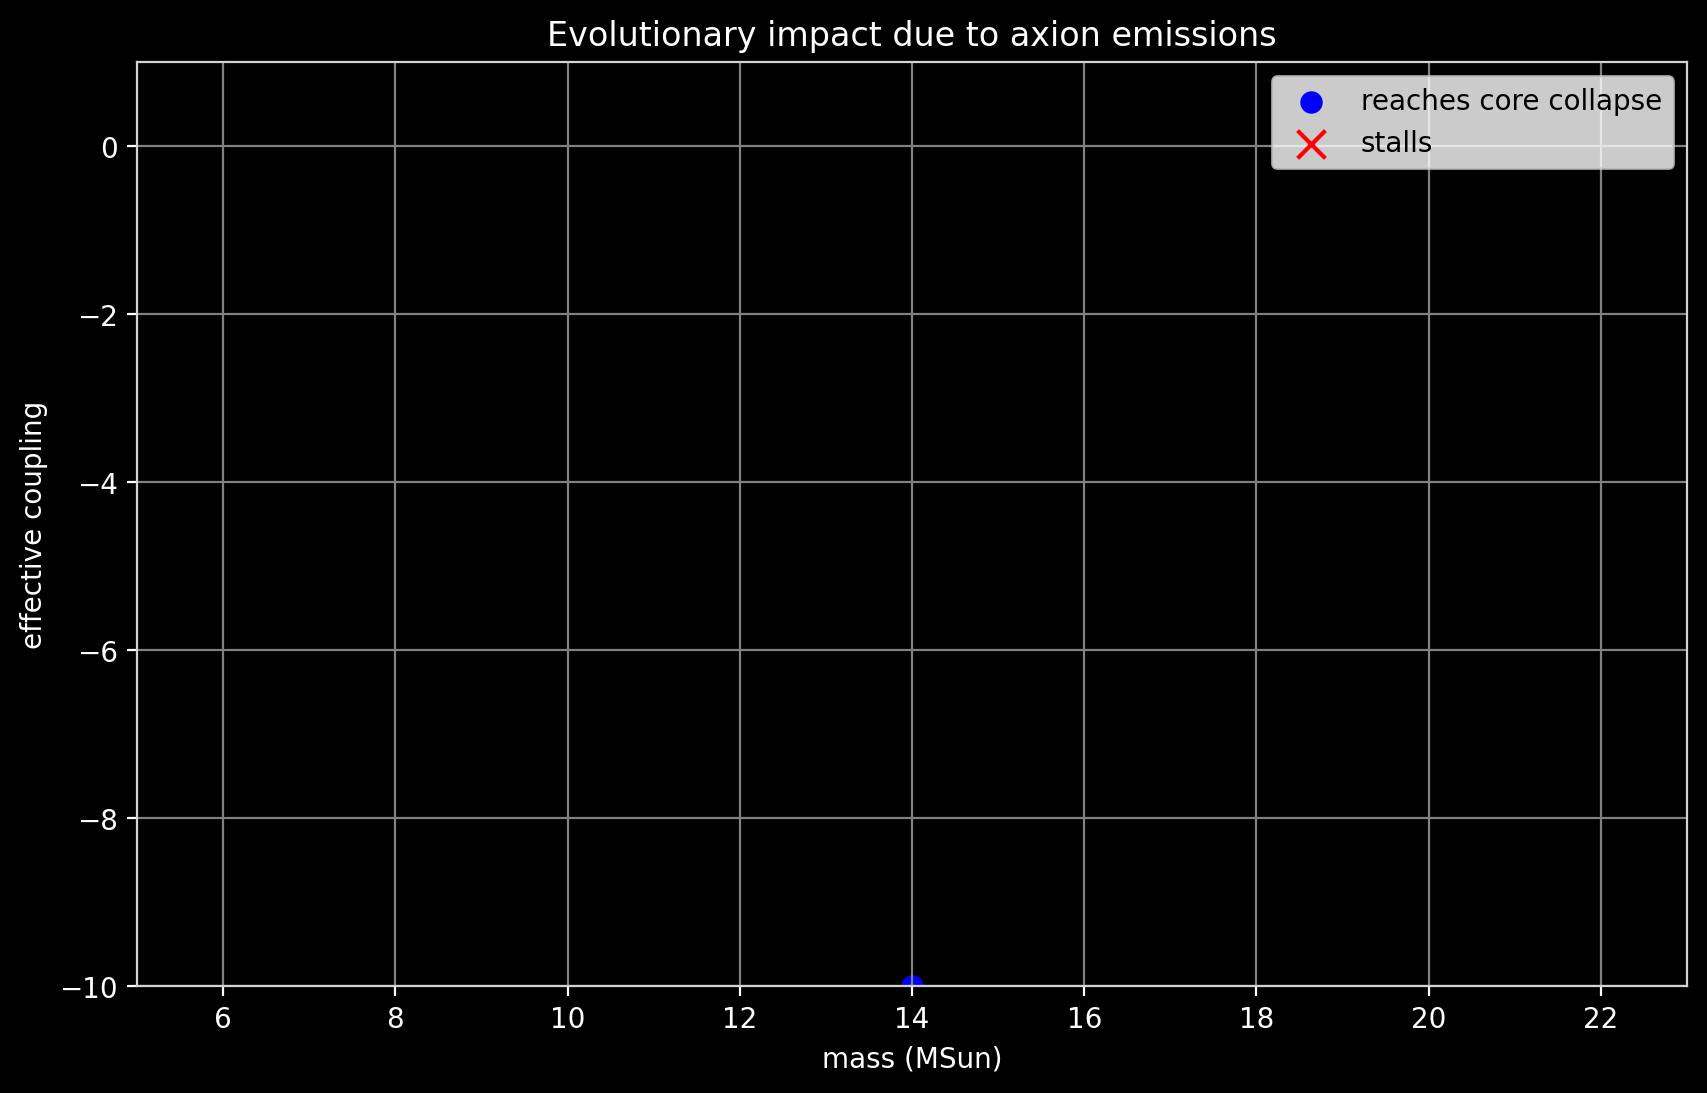

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('black')

couplings = np.zeros(len(runs))
masses = np.zeros_like(couplings)
Ts = np.zeros_like(couplings)
ages = np.zeros_like(couplings)
slices = np.zeros_like(couplings)

for (i, key) in enumerate(runs):
    run = runs[key]
    g = run['coupling'][0]
    m = run['mass (Msun)'][0]
    # if g > -8.8: continue
    couplings[i] = g
    masses[i] = m
    Ts[i] = np.array(run['core T (K)'])[-1]
    ages[i] = np.array(run['age (years)'])[-1]
    slices[i] = np.array(run['slice'])[-1]

Tcut = 1e9
slicecut = 4000
plt.grid(c='gray')
plt.scatter(masses[Ts>Tcut], couplings[Ts>Tcut], marker='o', c='blue', s=50, label='reaches core collapse')
plt.scatter(masses[Ts<Tcut], couplings[Ts<Tcut], marker='x', c='red', s=100, label='stalls')

plt.xlabel('mass (MSun)')
plt.ylabel('effective coupling')
plt.ylim(-10, 1)
plt.xlim(5, 23)
plt.legend()

plt.title('Evolutionary impact due to axion emissions', c='white')
# plt.legend()
plt.show()

Text(0, 0.5, 'Number of time steps')

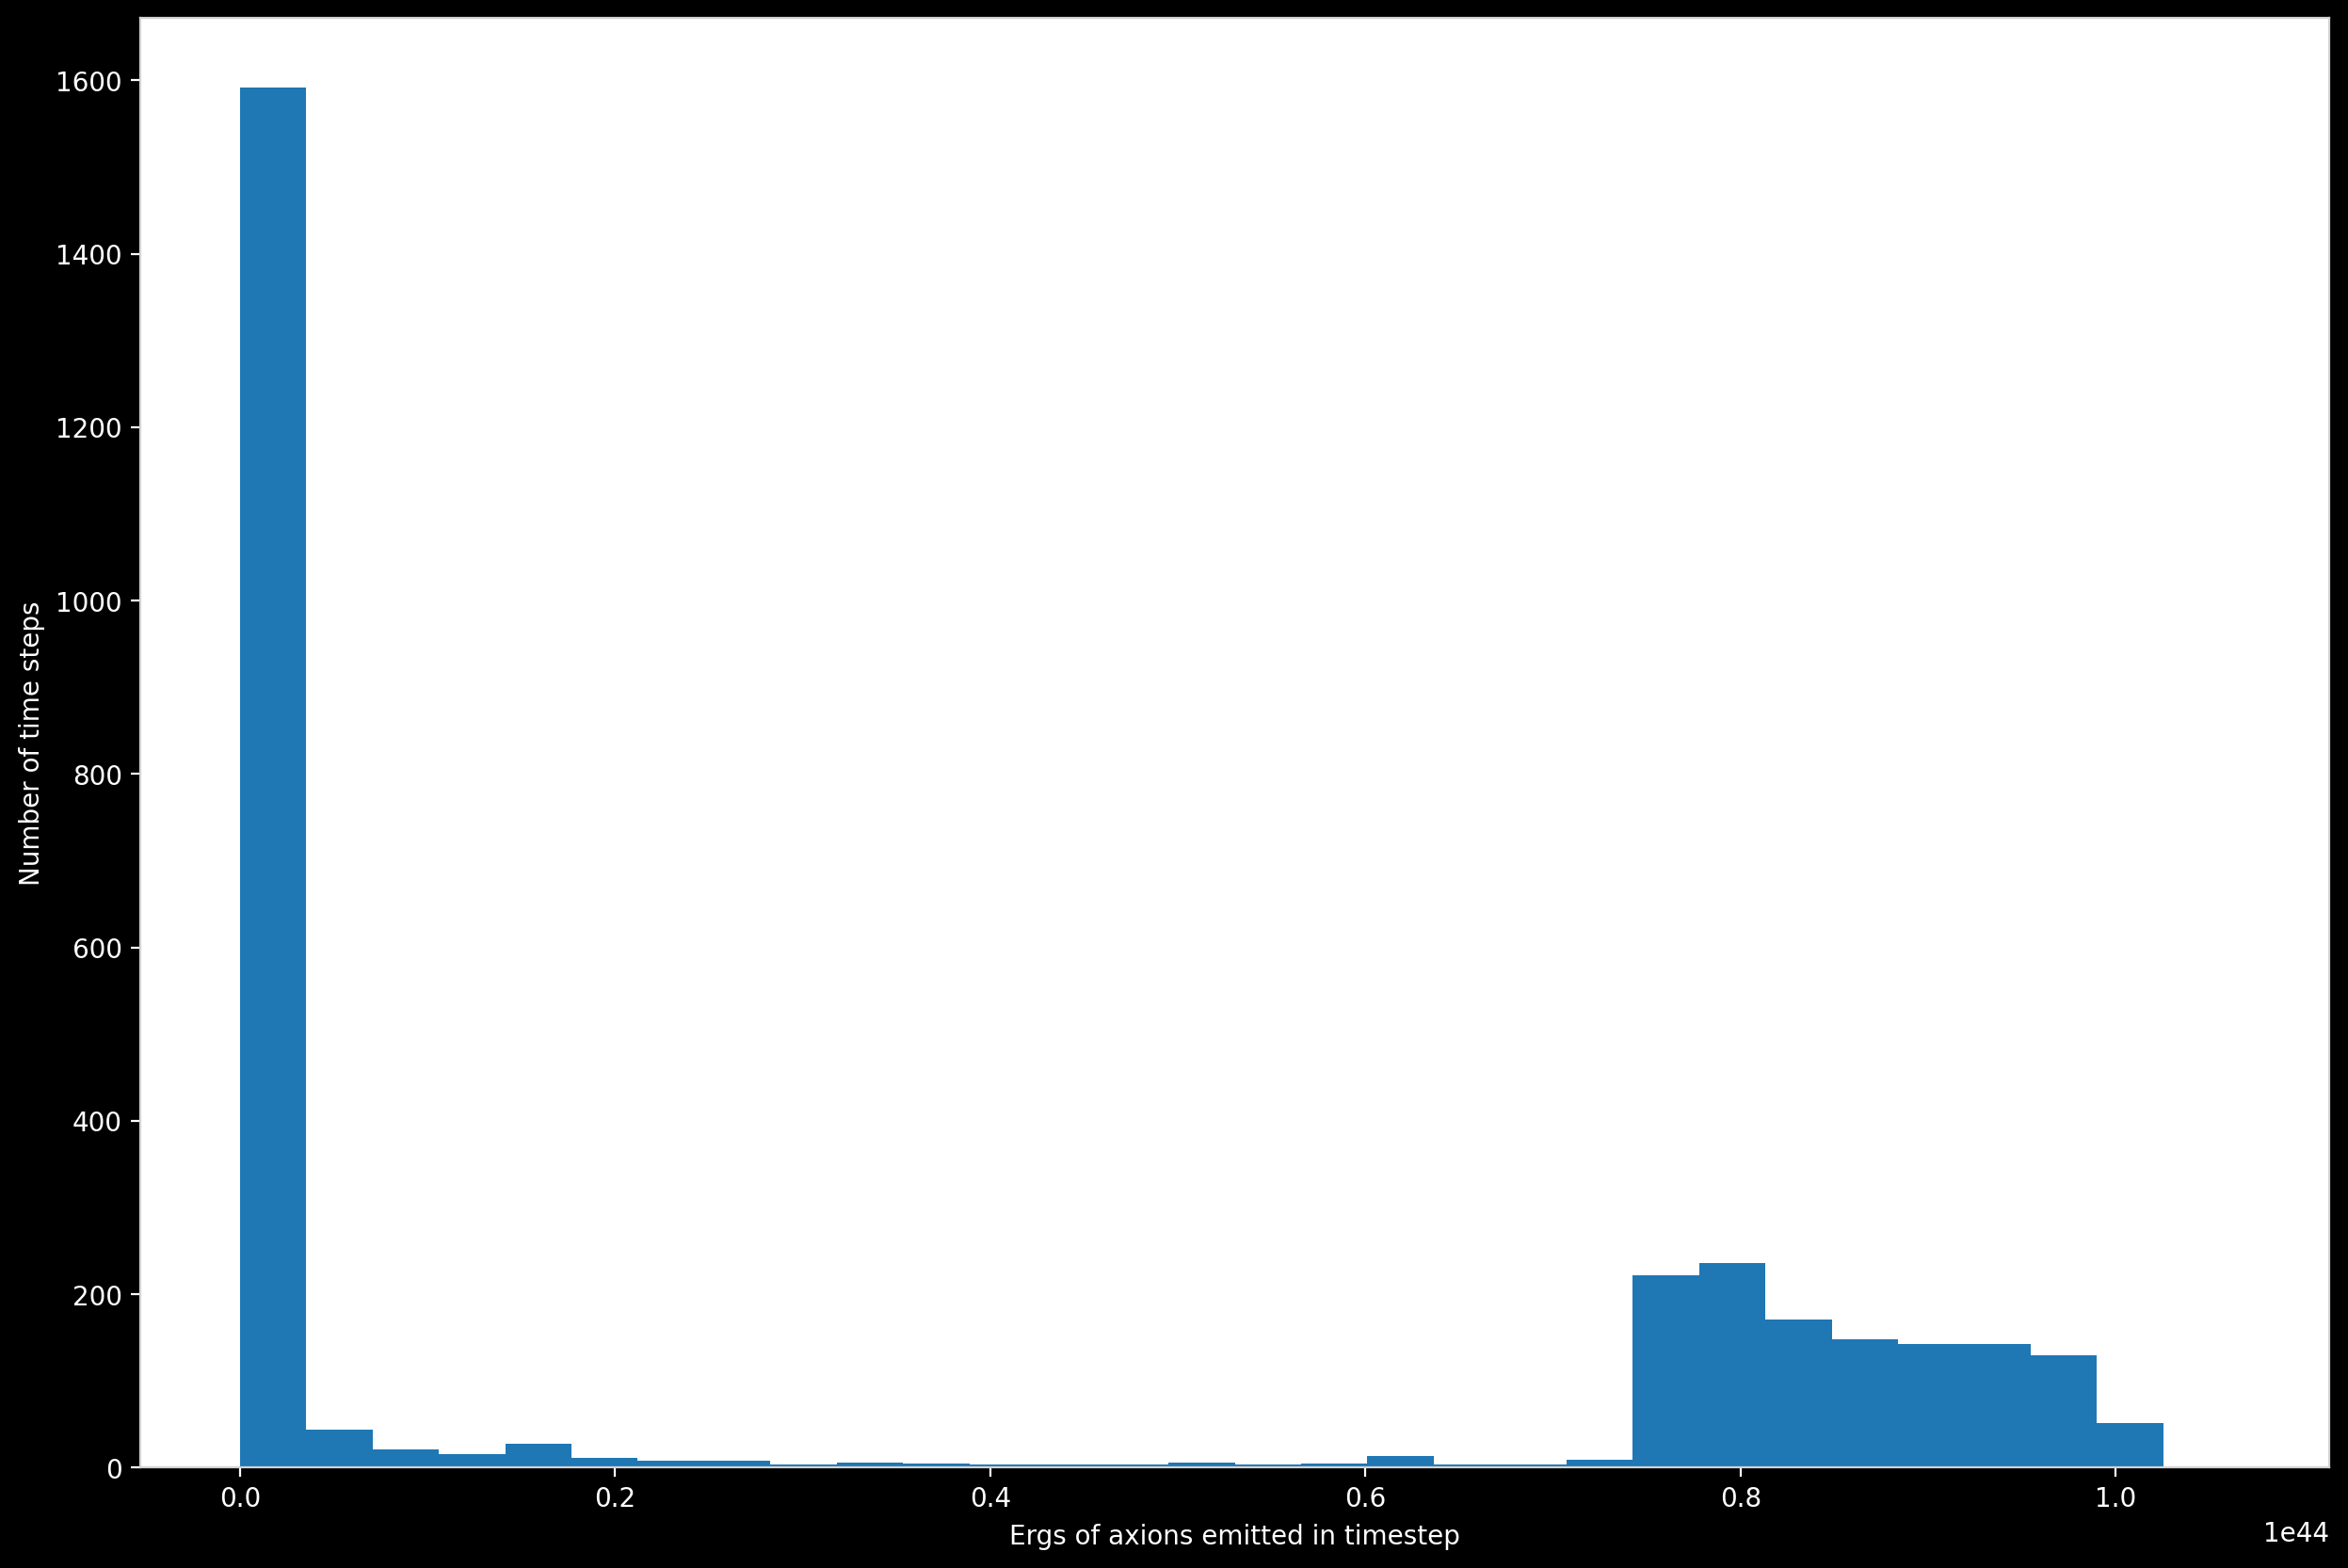

In [31]:
plt.hist(run['dt (years)'] * 3.154e+7 * run['surface lum_a (ergs/s)'], bins=30)
plt.xlabel("Ergs of axions emitted in timestep")
plt.ylabel("Number of time steps")

(0.0, 100000000.0)

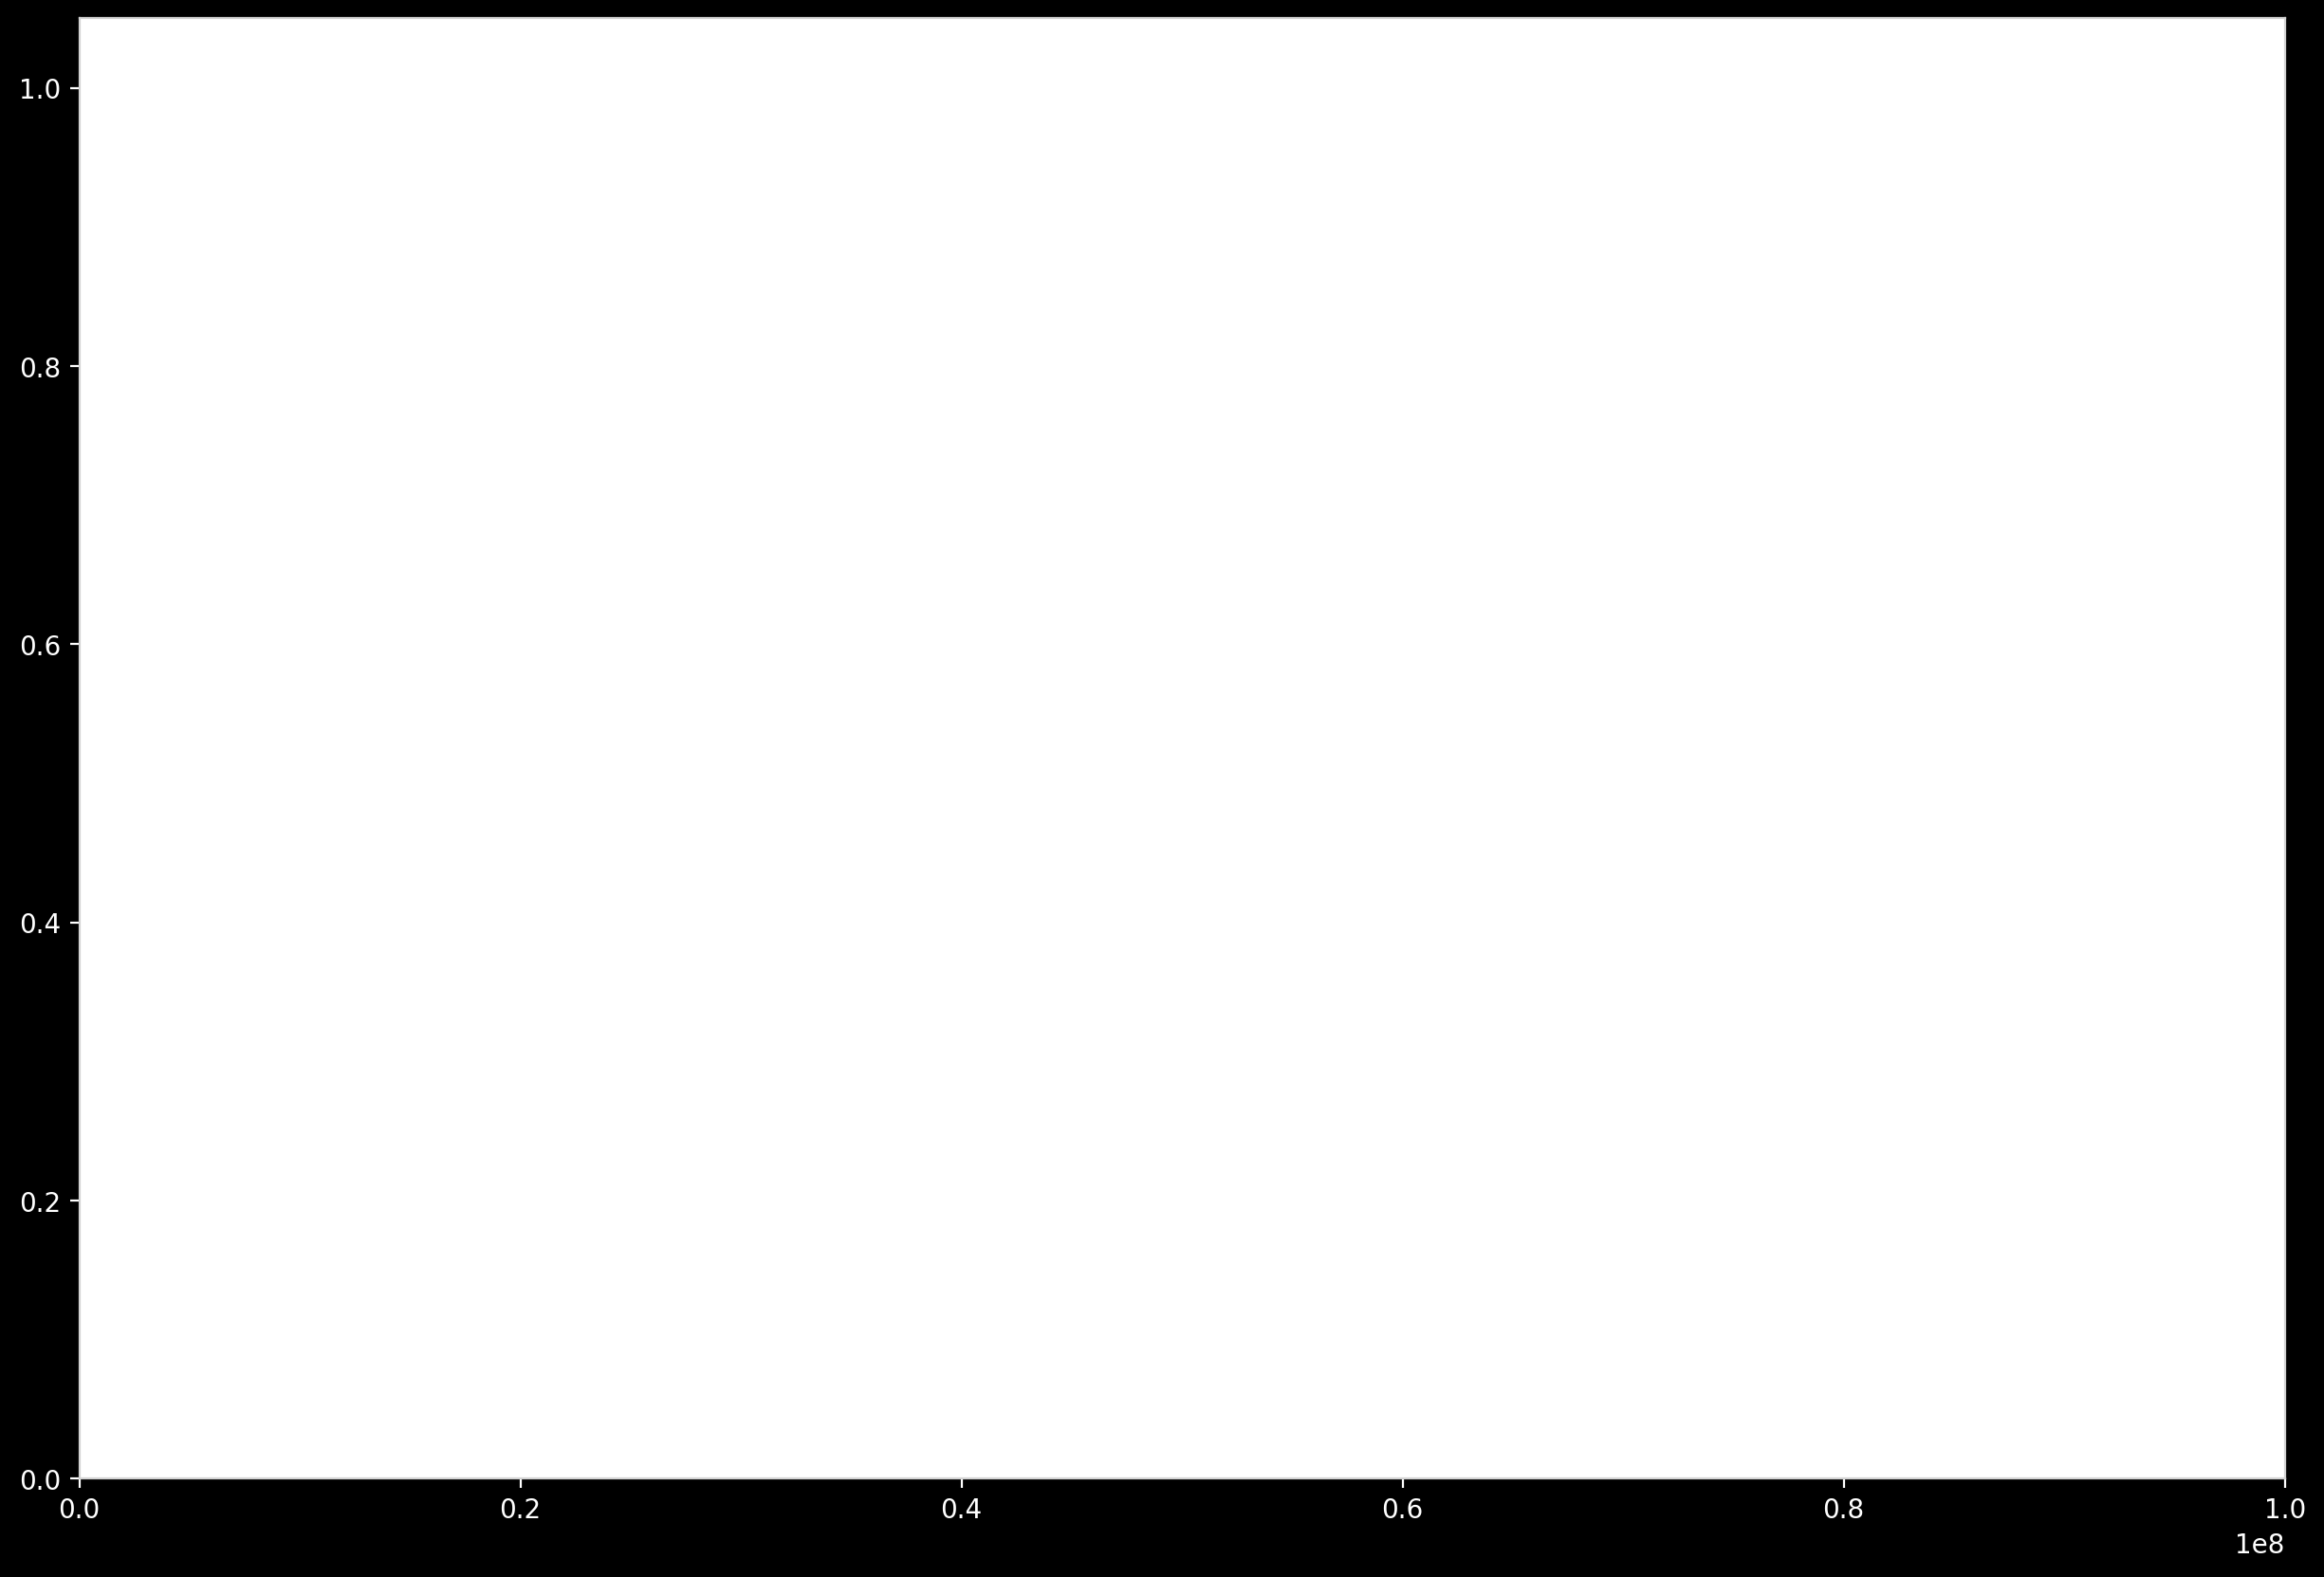

In [16]:
plt.hist(ages, bins=100)
plt.xlim(0, 1e8)

In [17]:
run

,slice,mass (Msun),coupling,age (years),time to core O depletion (years),dt (years),core T (K),effective T (K),surface lum_gamma (ergs/s),surface lum_neu (ergs/s),surface lum_a (ergs/s),cumulative e_gamma (ergs),cumulative e_neu (ergs),cumulative e_a (ergs),avg X_c12,avg X_o16,avg X_ne20,avg X_na23
0,1.0,14.0,-10.0,1.000000e-05,1.624922e+07,0.000010,5.891959e+05,4265.798517,1.174938e+17,0.000000e+00,0.000000e+00,3.705286e+19,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
1,93.0,14.0,-10.0,1.000000e+03,1.624822e+07,49.626423,7.994194e+05,4459.202872,1.765045e+19,0.000000e+00,0.000000e+00,2.762329e+28,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
2,94.0,14.0,-10.0,1.059552e+03,1.624816e+07,59.551707,8.059072e+05,4105.657857,1.225174e+19,0.000000e+00,0.000000e+00,5.063234e+28,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,1.000000e-99
3,95.0,14.0,-10.0,1.122081e+03,1.624810e+07,62.529293,8.129496e+05,4107.613021,1.490330e+19,0.000000e+00,0.000000e+00,8.002050e+28,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,3.584361e-100
4,96.0,14.0,-10.0,1.187737e+03,1.624803e+07,65.655757,8.202584e+05,4110.665252,1.781277e+19,0.000000e+00,0.000000e+00,1.169022e+29,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,1.000062e-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,3134.0,14.0,-10.0,1.624922e+07,1.936005e-03,0.000518,2.402552e+09,3117.707859,8.667625e+44,9.459034e+44,2.676260e+37,5.695971e+52,2.625023e+51,1.128886e+47,0.022723,0.085880,0.034375,1.239107e-03
3043,3135.0,14.0,-10.0,1.624922e+07,1.392489e-03,0.000544,2.413732e+09,3117.711561,8.496934e+44,9.909459e+44,2.707417e+37,5.697428e+52,2.642008e+51,1.128891e+47,0.022711,0.085004,0.034229,1.235217e-03
3044,3136.0,14.0,-10.0,1.624922e+07,8.217972e-04,0.000571,2.438881e+09,3117.715364,7.770145e+44,1.073092e+45,2.796497e+37,5.698826e+52,2.661321e+51,1.128896e+47,0.022697,0.084106,0.034146,1.230298e-03
3045,3137.0,14.0,-10.0,1.624922e+07,3.652424e-04,0.000457,2.455196e+09,3117.718354,8.990060e+44,1.133566e+45,2.831685e+37,5.700120e+52,2.677642e+51,1.128900e+47,0.022682,0.083286,0.034048,1.223847e-03


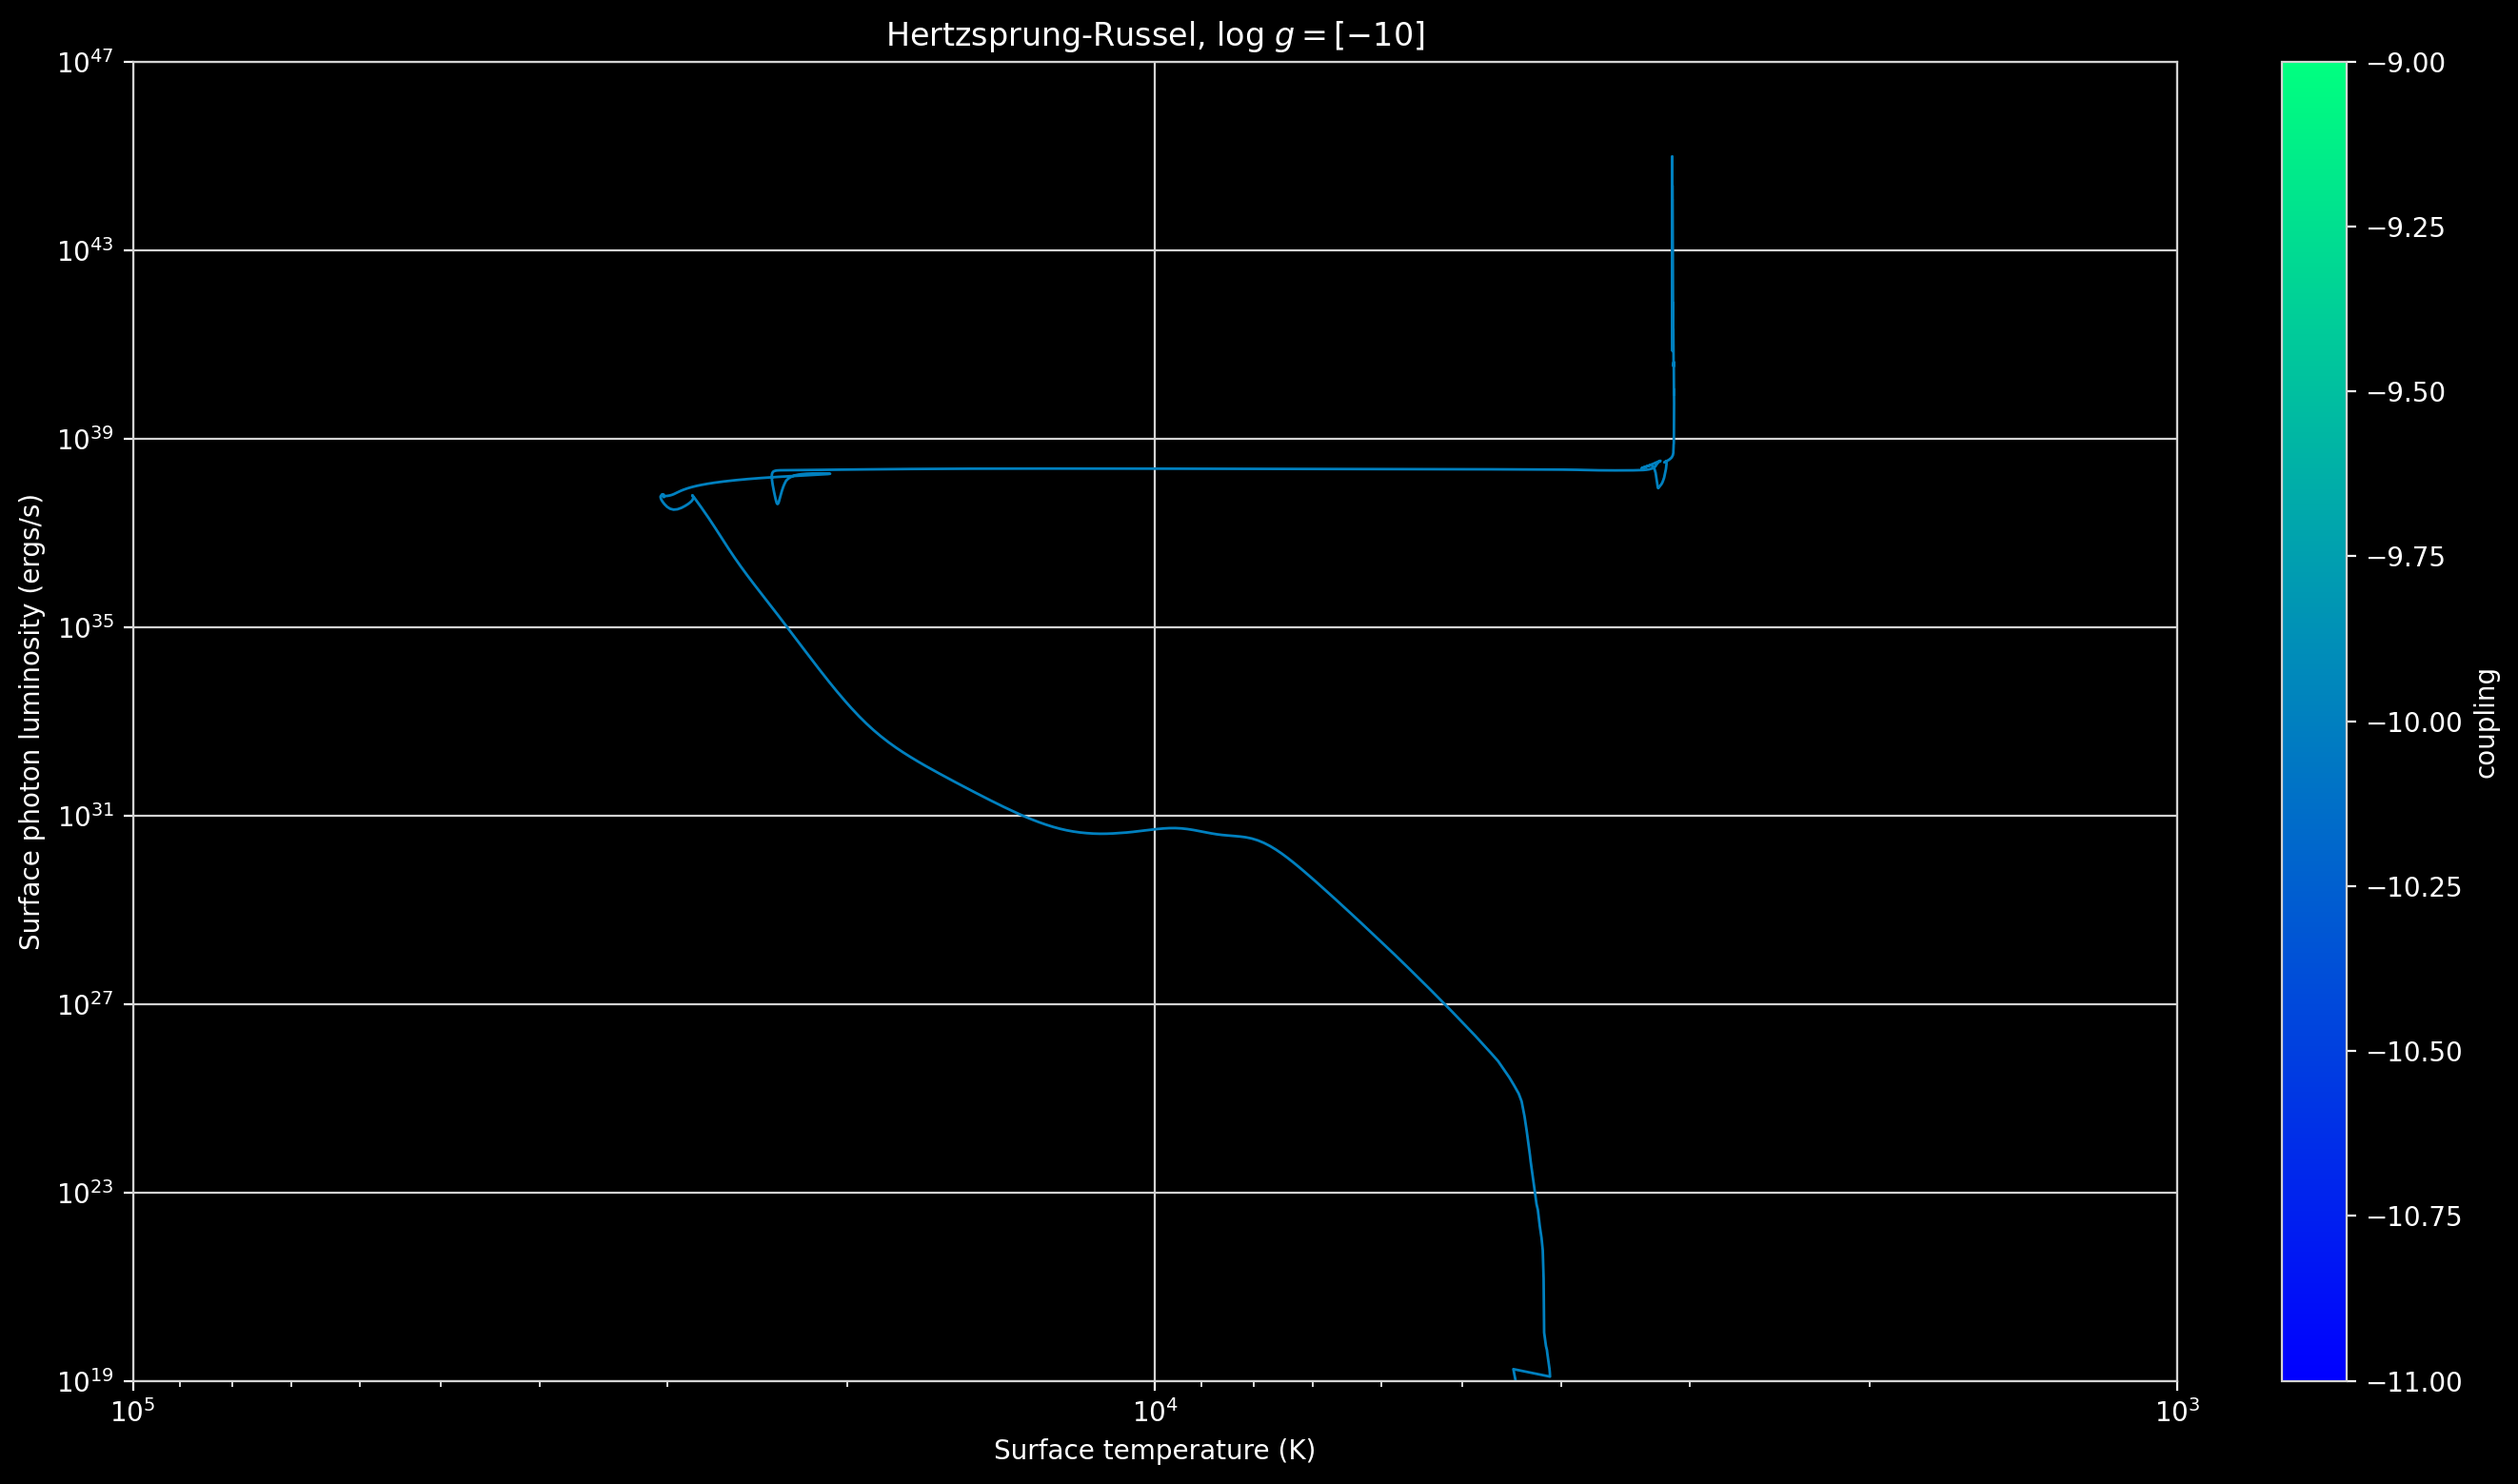

In [18]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap_g, label='coupling', cax=color_ax)
###

plt.sca(main_ax)
main_ax.set_yscale('log')
main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

G = [-10]

for key in reversed(runs):
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    if g not in G: continue
    x = np.array(run['effective T (K)'])
    y = np.array(run['surface lum_gamma (ergs/s)'])
    Tend = np.array(run['core T (K)'])[-1]
    plt.plot(x, y, c=colormap_g.to_rgba(g), lw=1)
    # plt.plot(x, y, c=('red' if Tend < Tcut else 'blue'))

plt.xlabel('Surface temperature (K)')
plt.ylabel('Surface photon luminosity (ergs/s)')
plt.xlim(1e5, 1e3)
plt.ylim(1e19, 1e47)
plt.grid()

plt.title(f'Hertzsprung-Russel, log $g = {G}$', c='white')
# plt.legend()
plt.show()

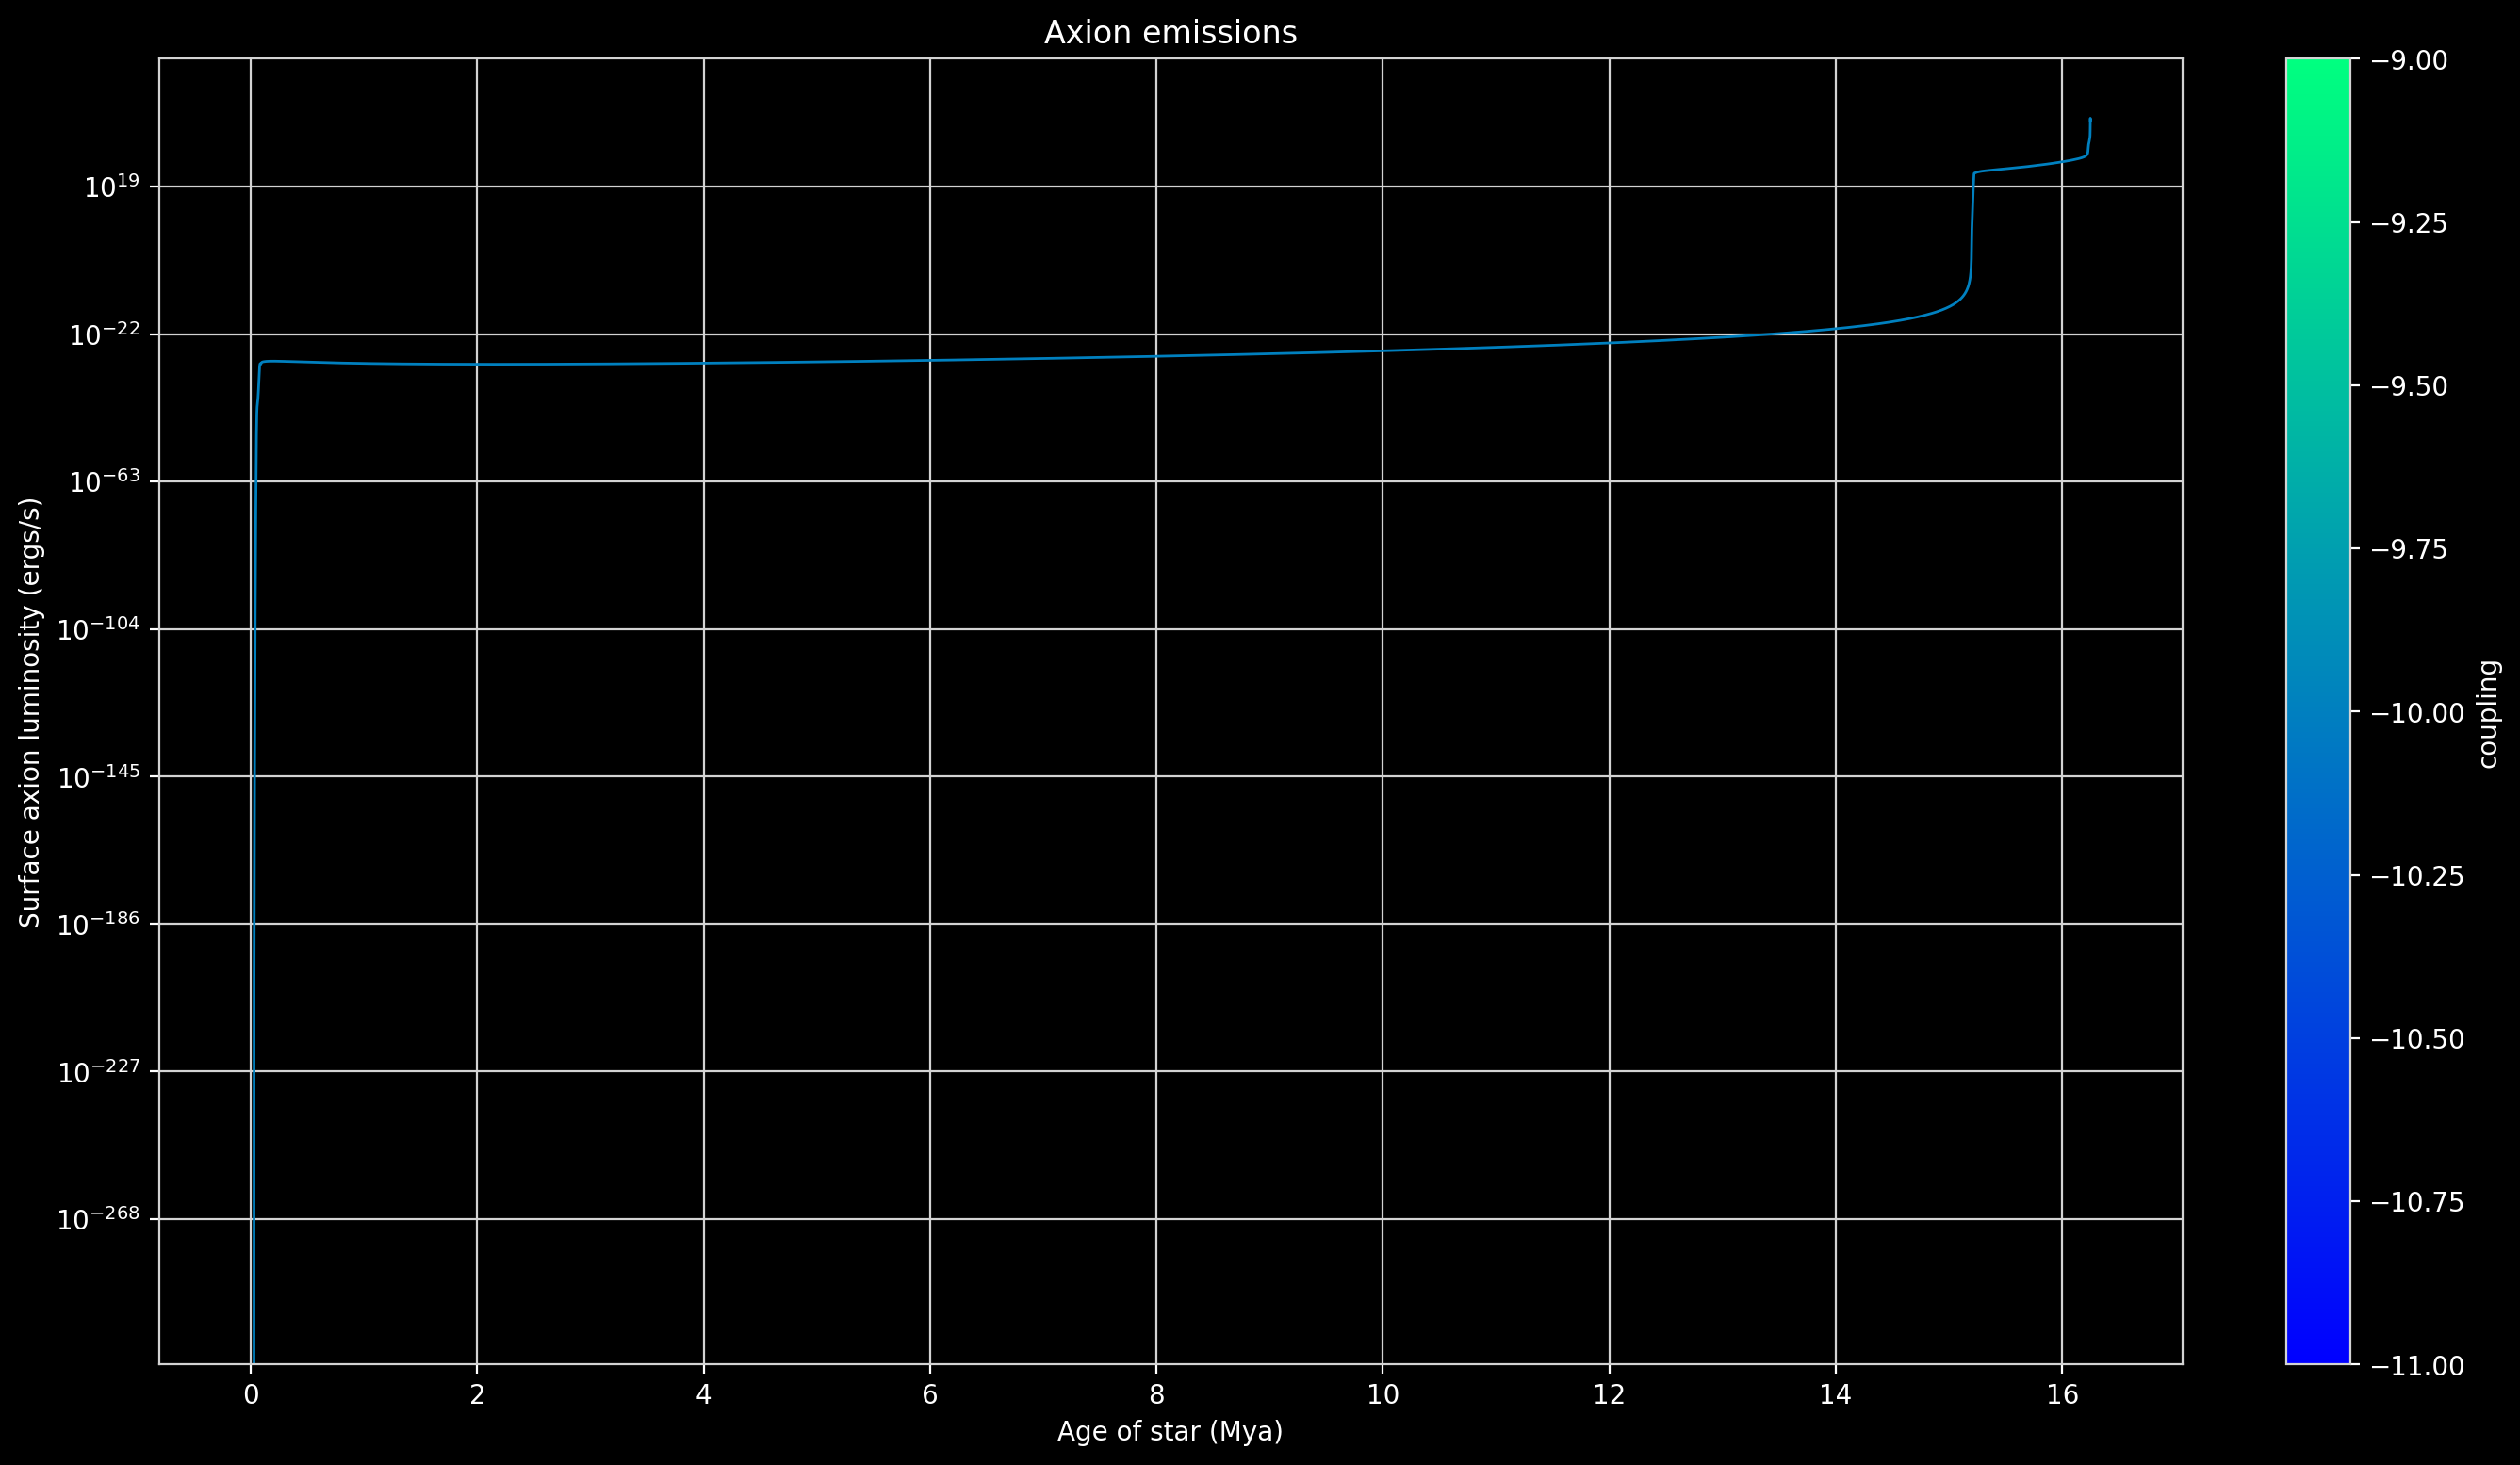

In [21]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap_g, label='coupling', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

G = [-10]

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    if g not in G: continue
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['surface lum_a (ergs/s)'])
    plt.plot(x, y, lw=1, label=key, color=colormap_g.to_rgba(g))
    # plt.plot(x, y, lw=(2 if np.array(run['core T (K)'])[-1] < Tcut else 1), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

# plt.ylim(1e32, 1e42)
# plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions', c='white')
# plt.legend()
plt.show()

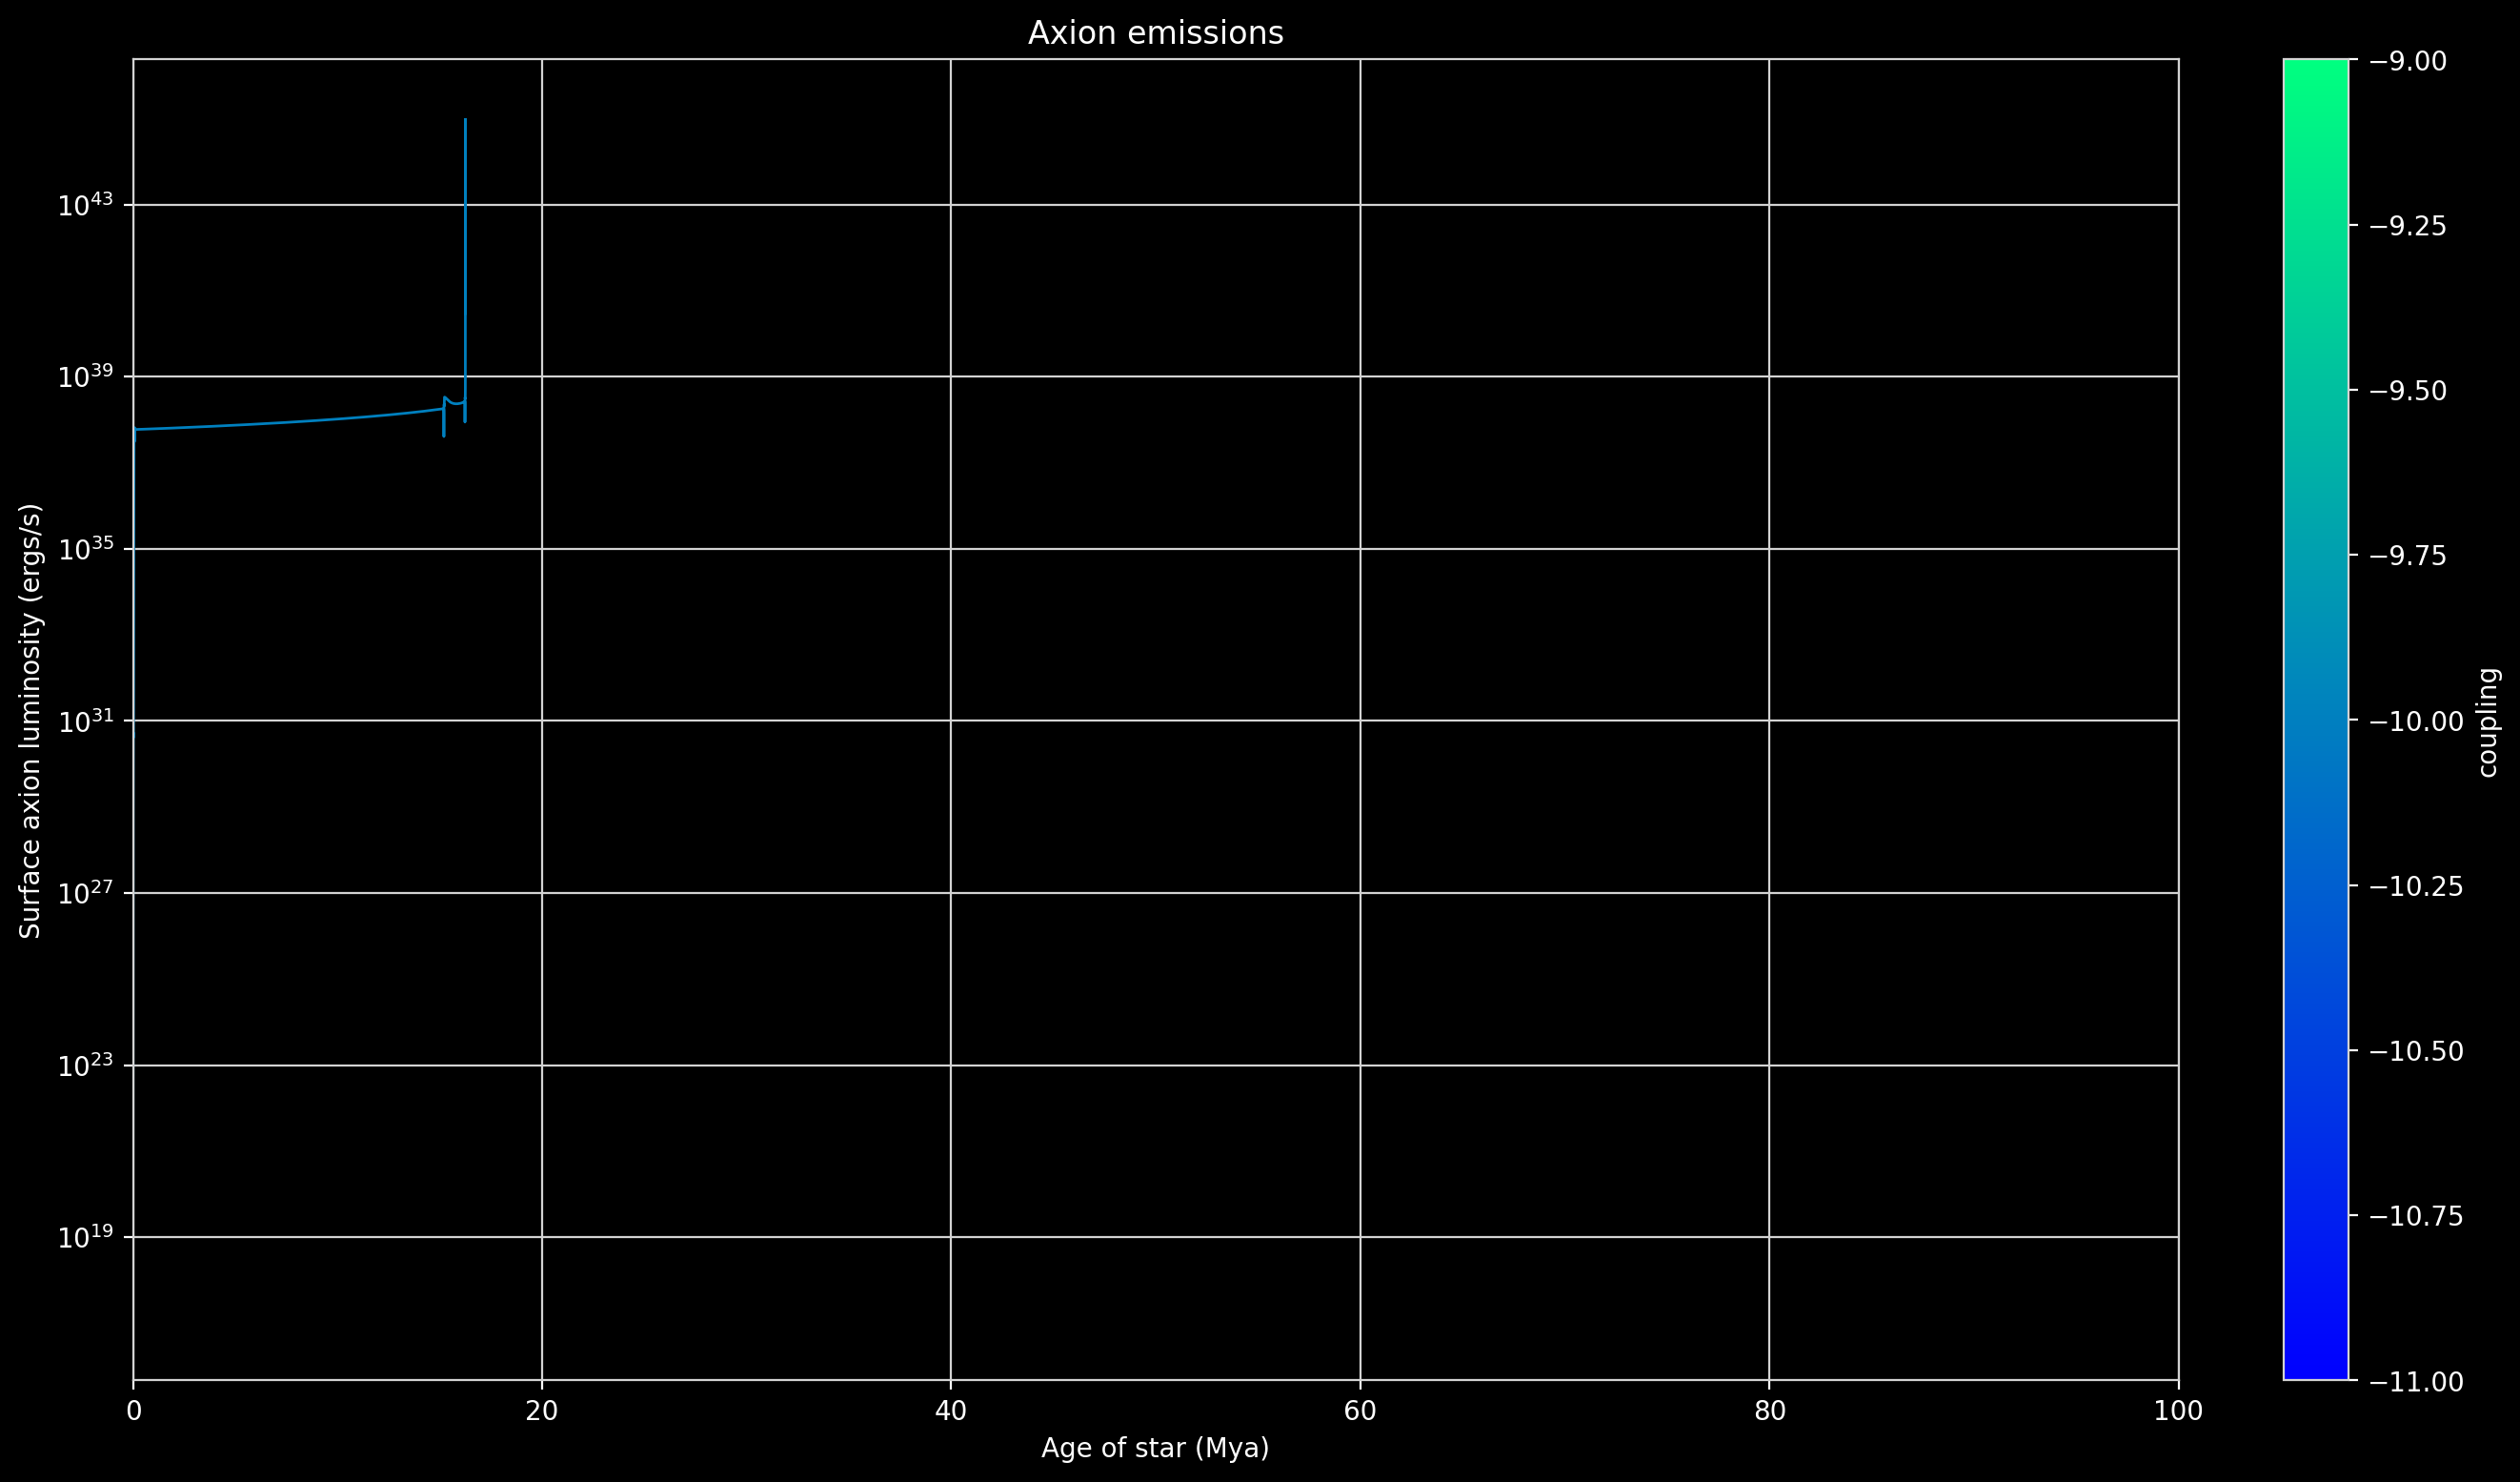

In [20]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap_g, label='coupling', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in reversed(runs):
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['surface lum_gamma (ergs/s)'])
    plt.plot(x, y, lw=1, label=key, color=colormap_g.to_rgba(g))
    # plt.plot(x, y, lw=(2 if np.array(run['core T (K)'])[-1] < Tcut else 1), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

# plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions', c='white')
# plt.legend()
plt.show()

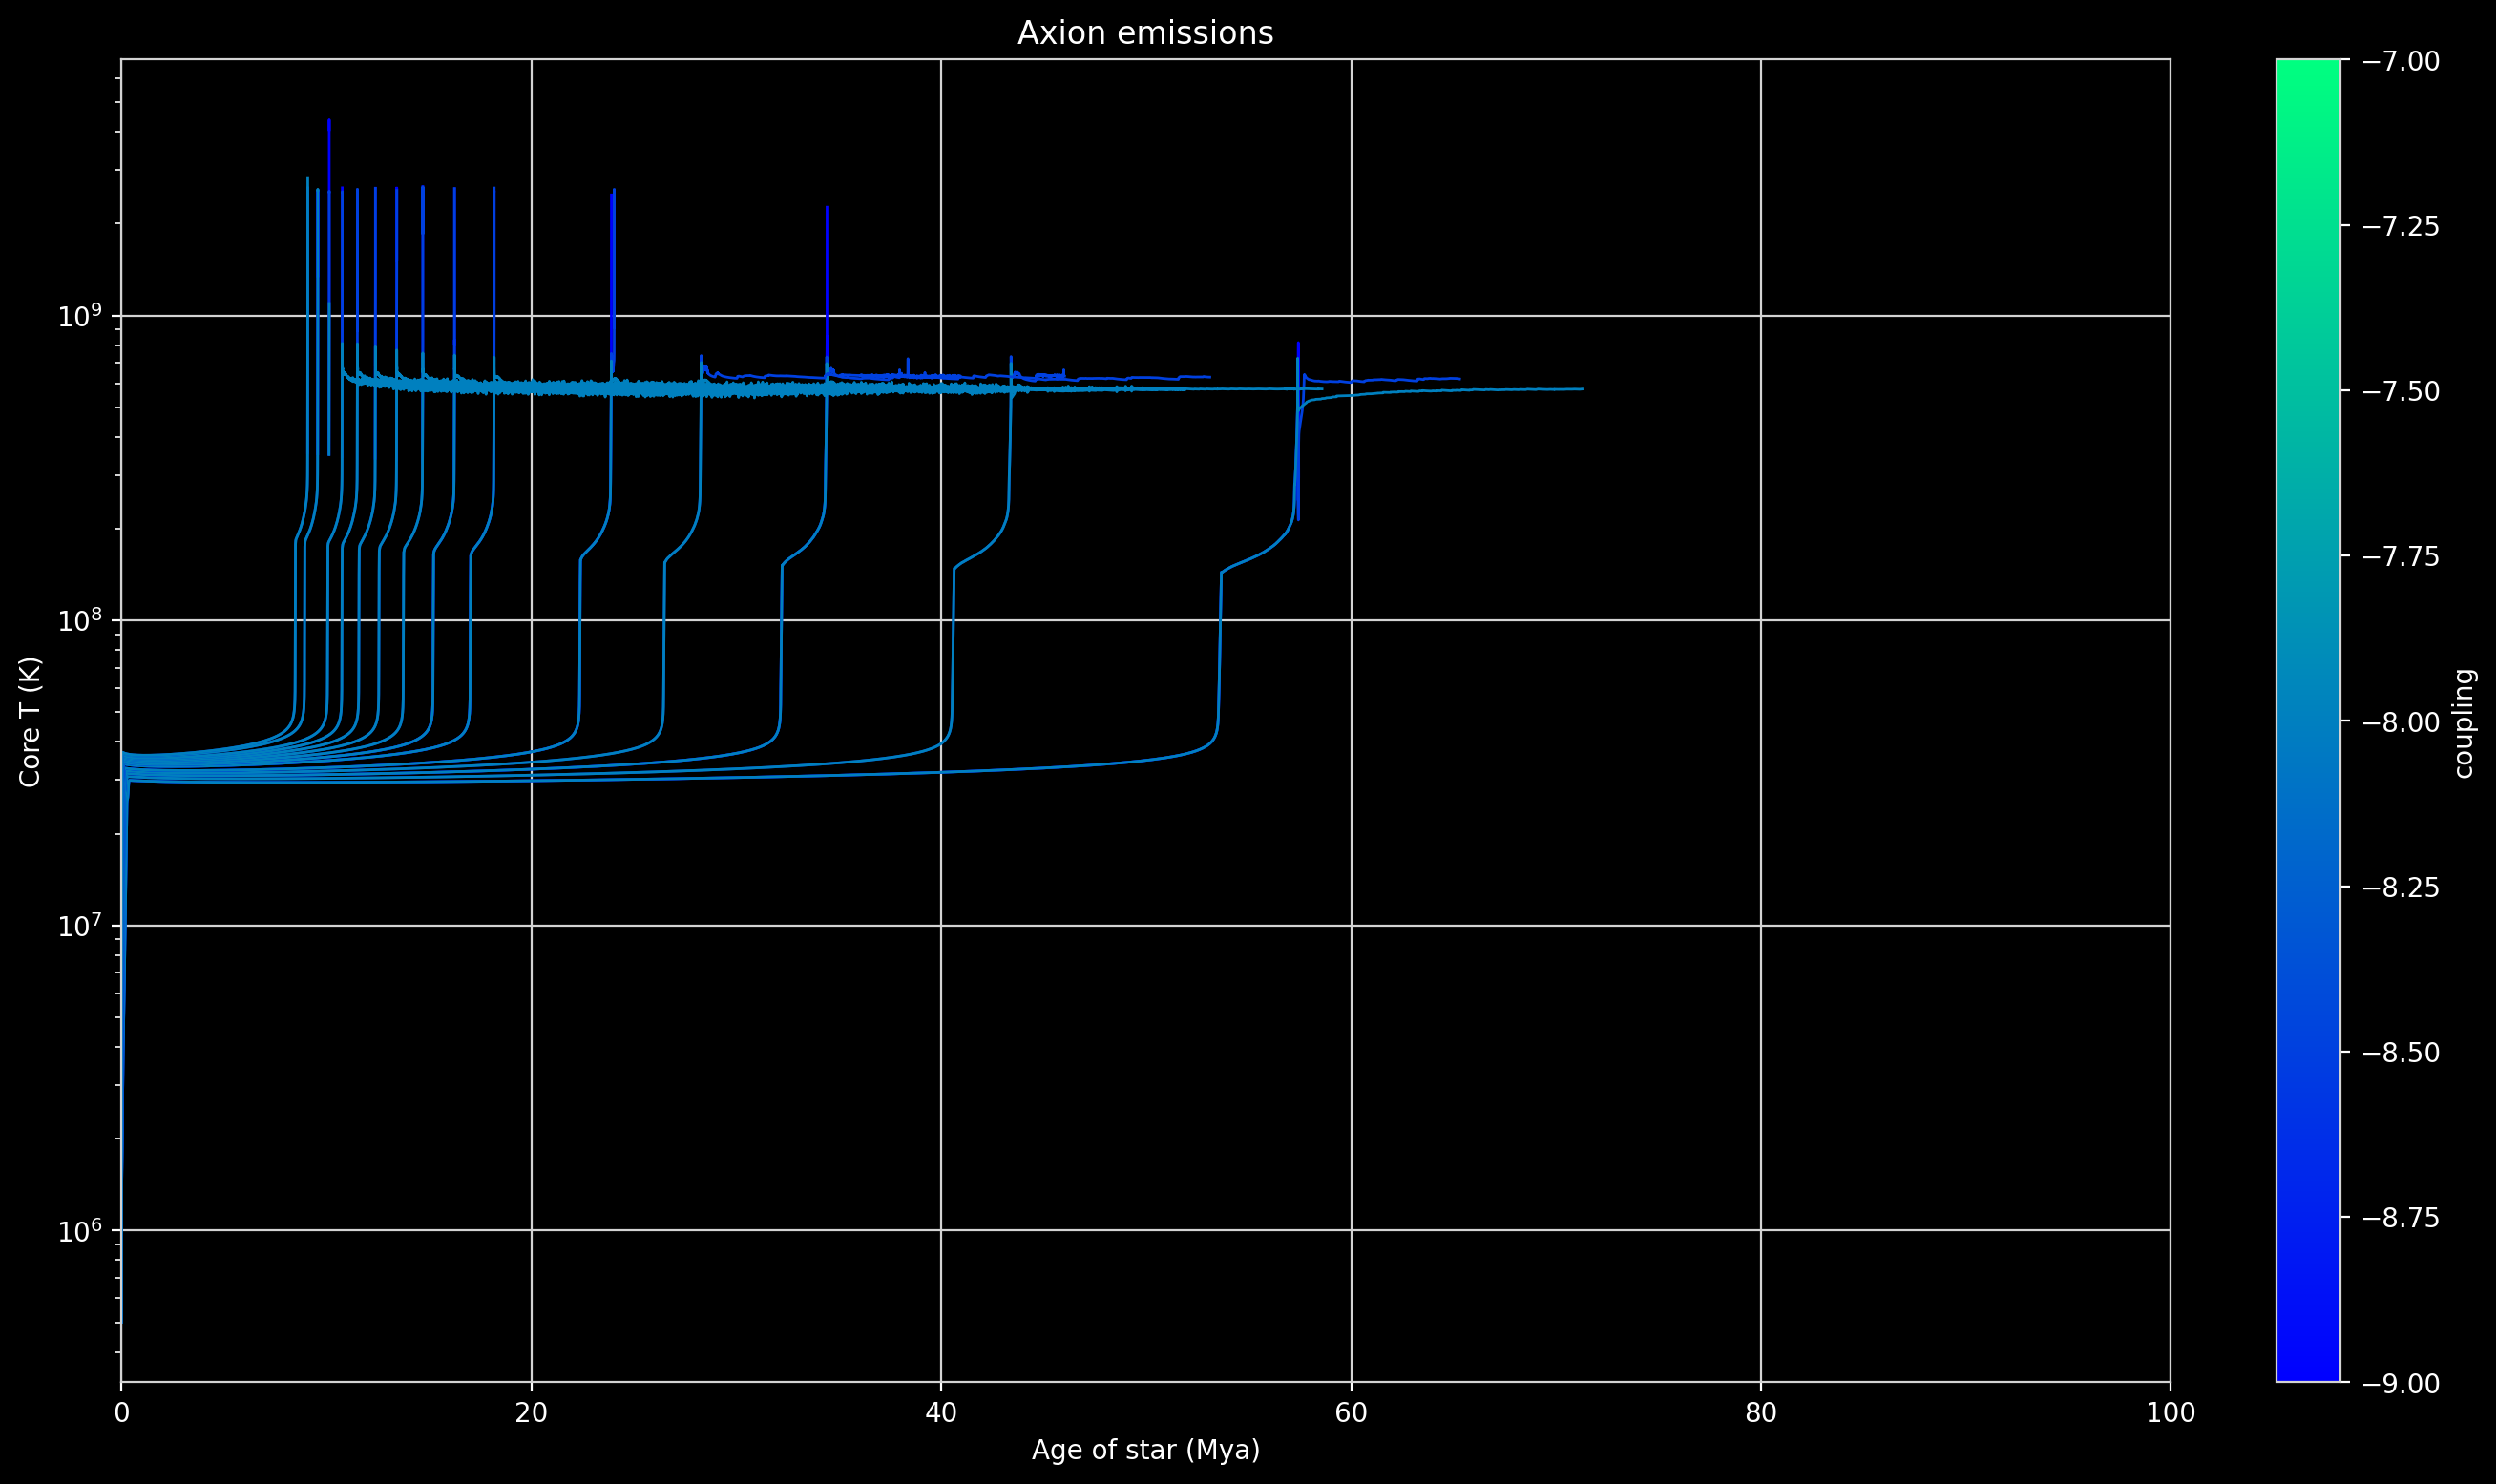

In [36]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap_g, label='coupling', cax=color_ax)
###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    if g > -8: continue
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['core T (K)'])
    # plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=1, label=key, color=colormap_g.to_rgba(g))
    # plt.plot(x, y, lw=(1 if np.array(run['core T (K)'])[-1] < Tcut else 2), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

# plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Core T (K)')
plt.grid()

plt.title('Axion emissions', c='white')
# plt.legend()
plt.show()

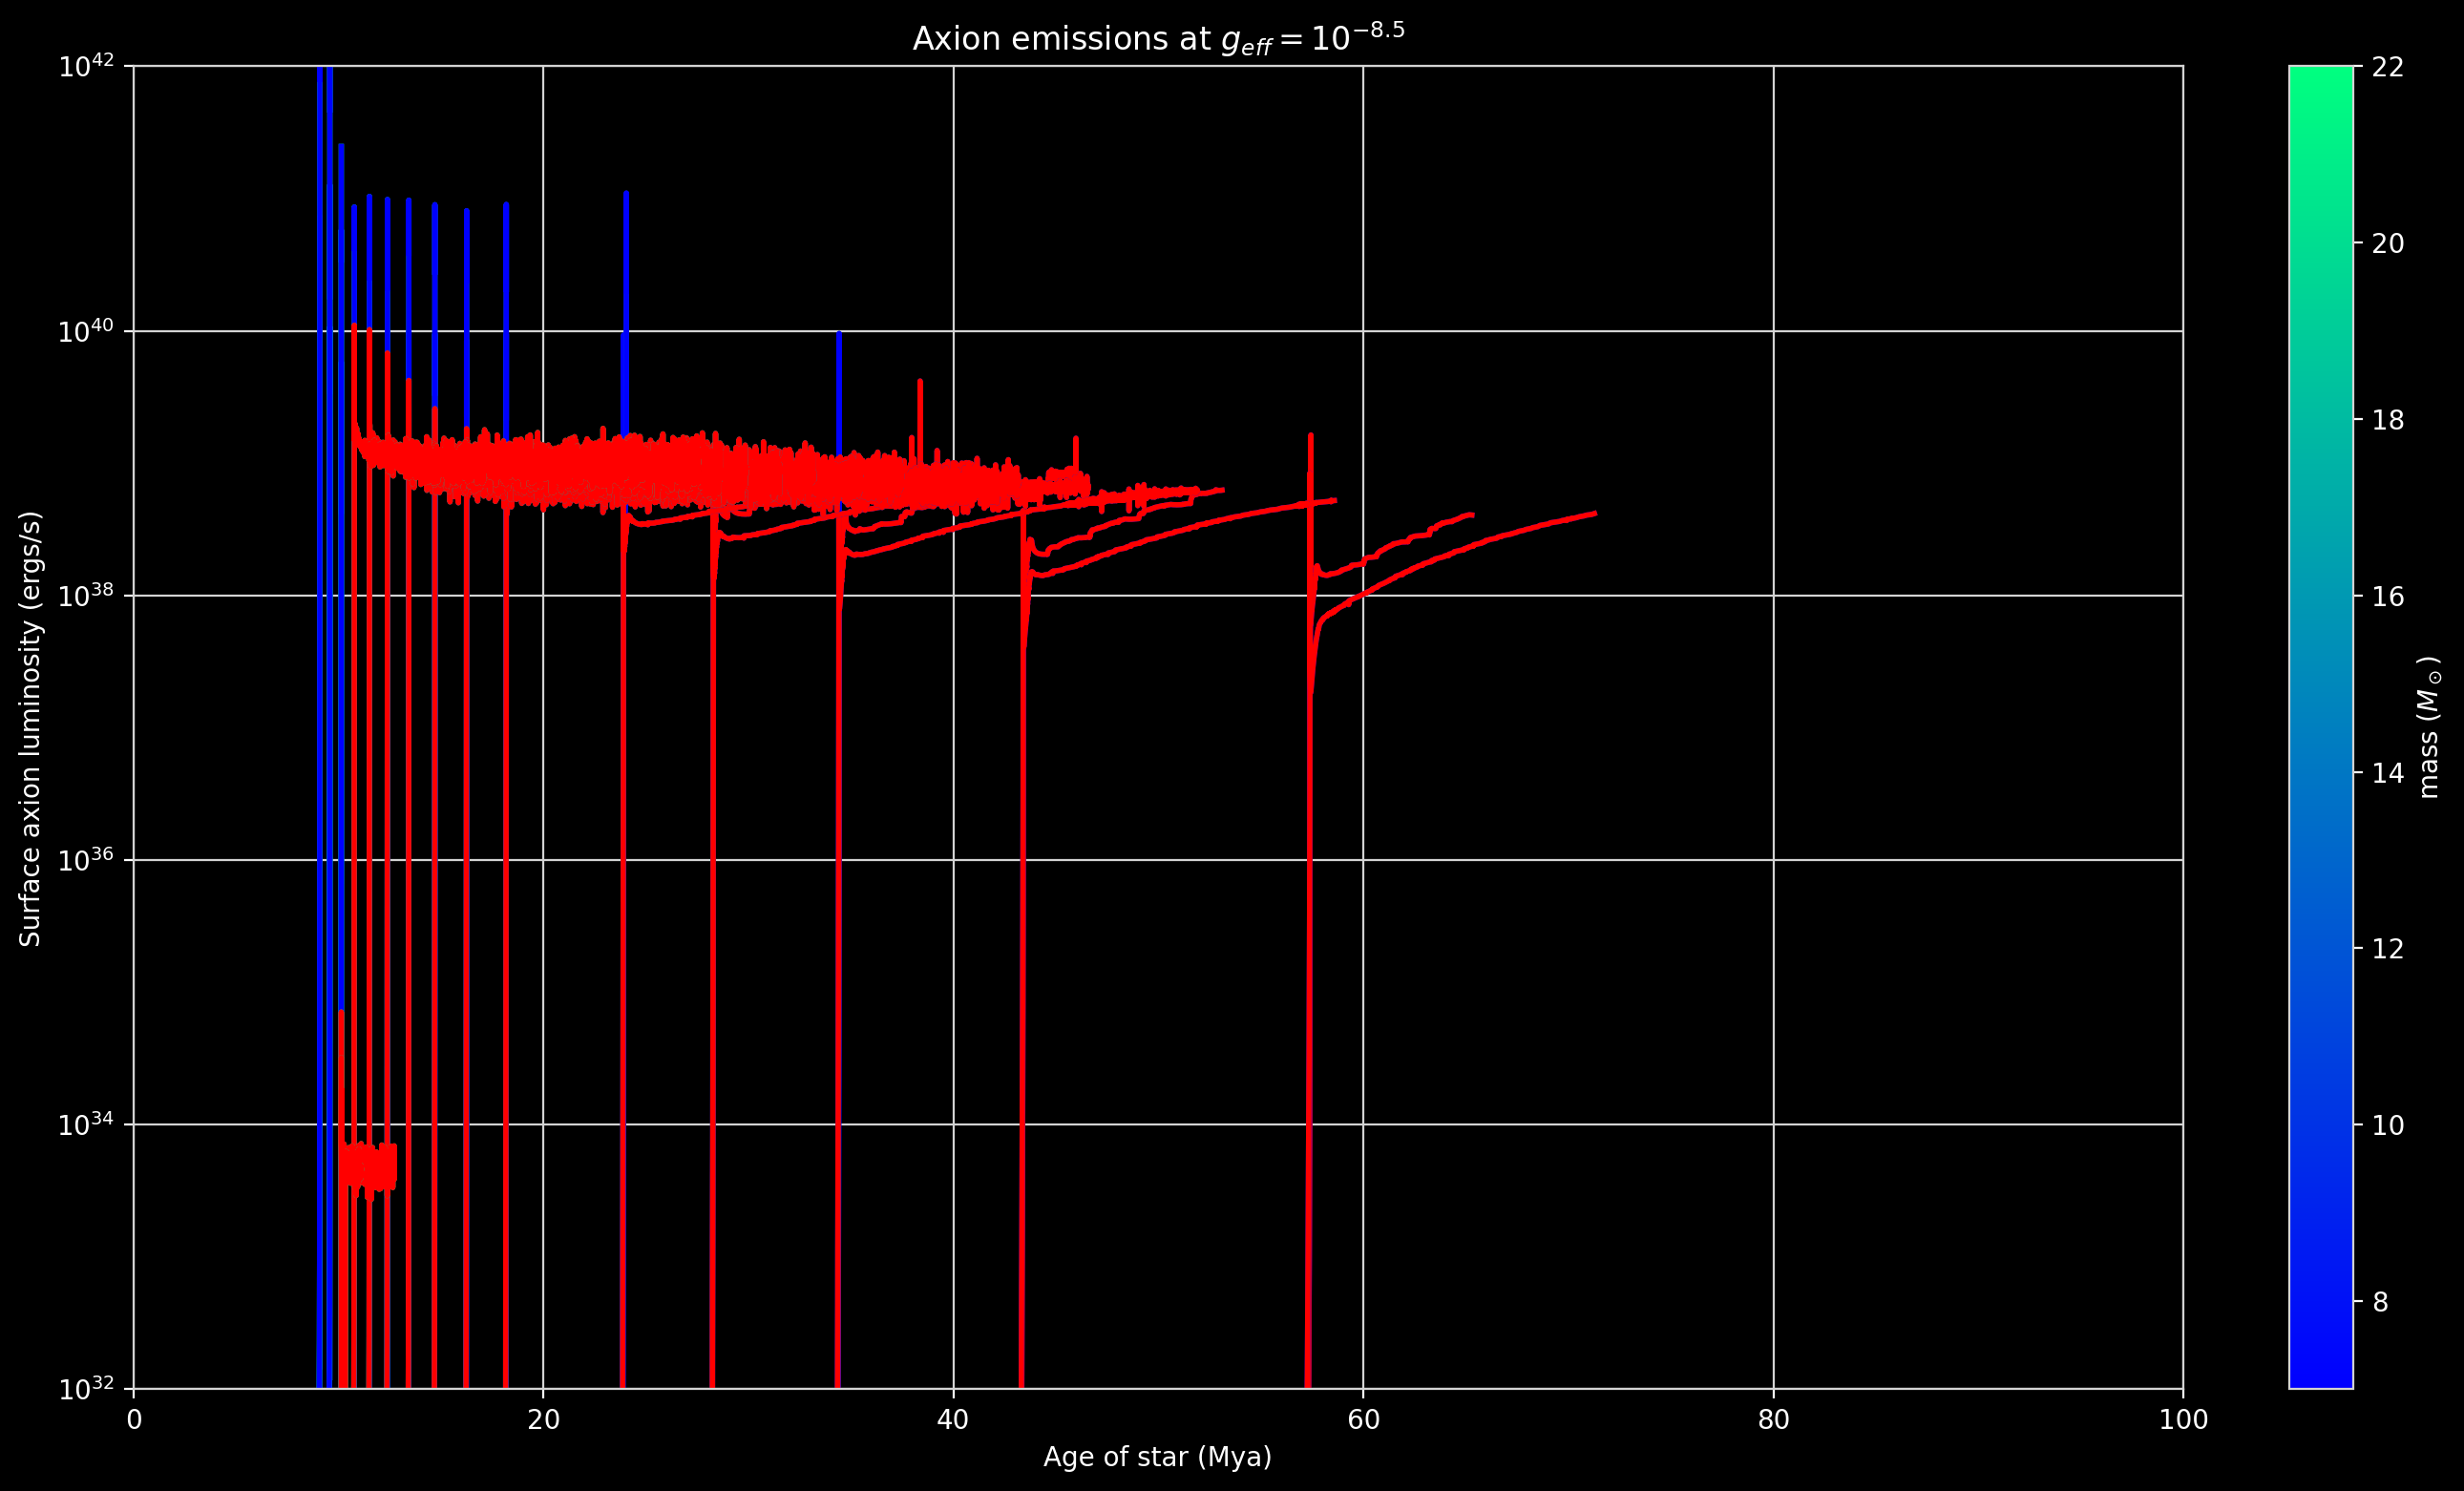

In [13]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['surface lum_a (ergs/s)'])
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=2, label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions at $g_{eff}=10^{-8.5}$', c='white')
# plt.legend()
plt.show()

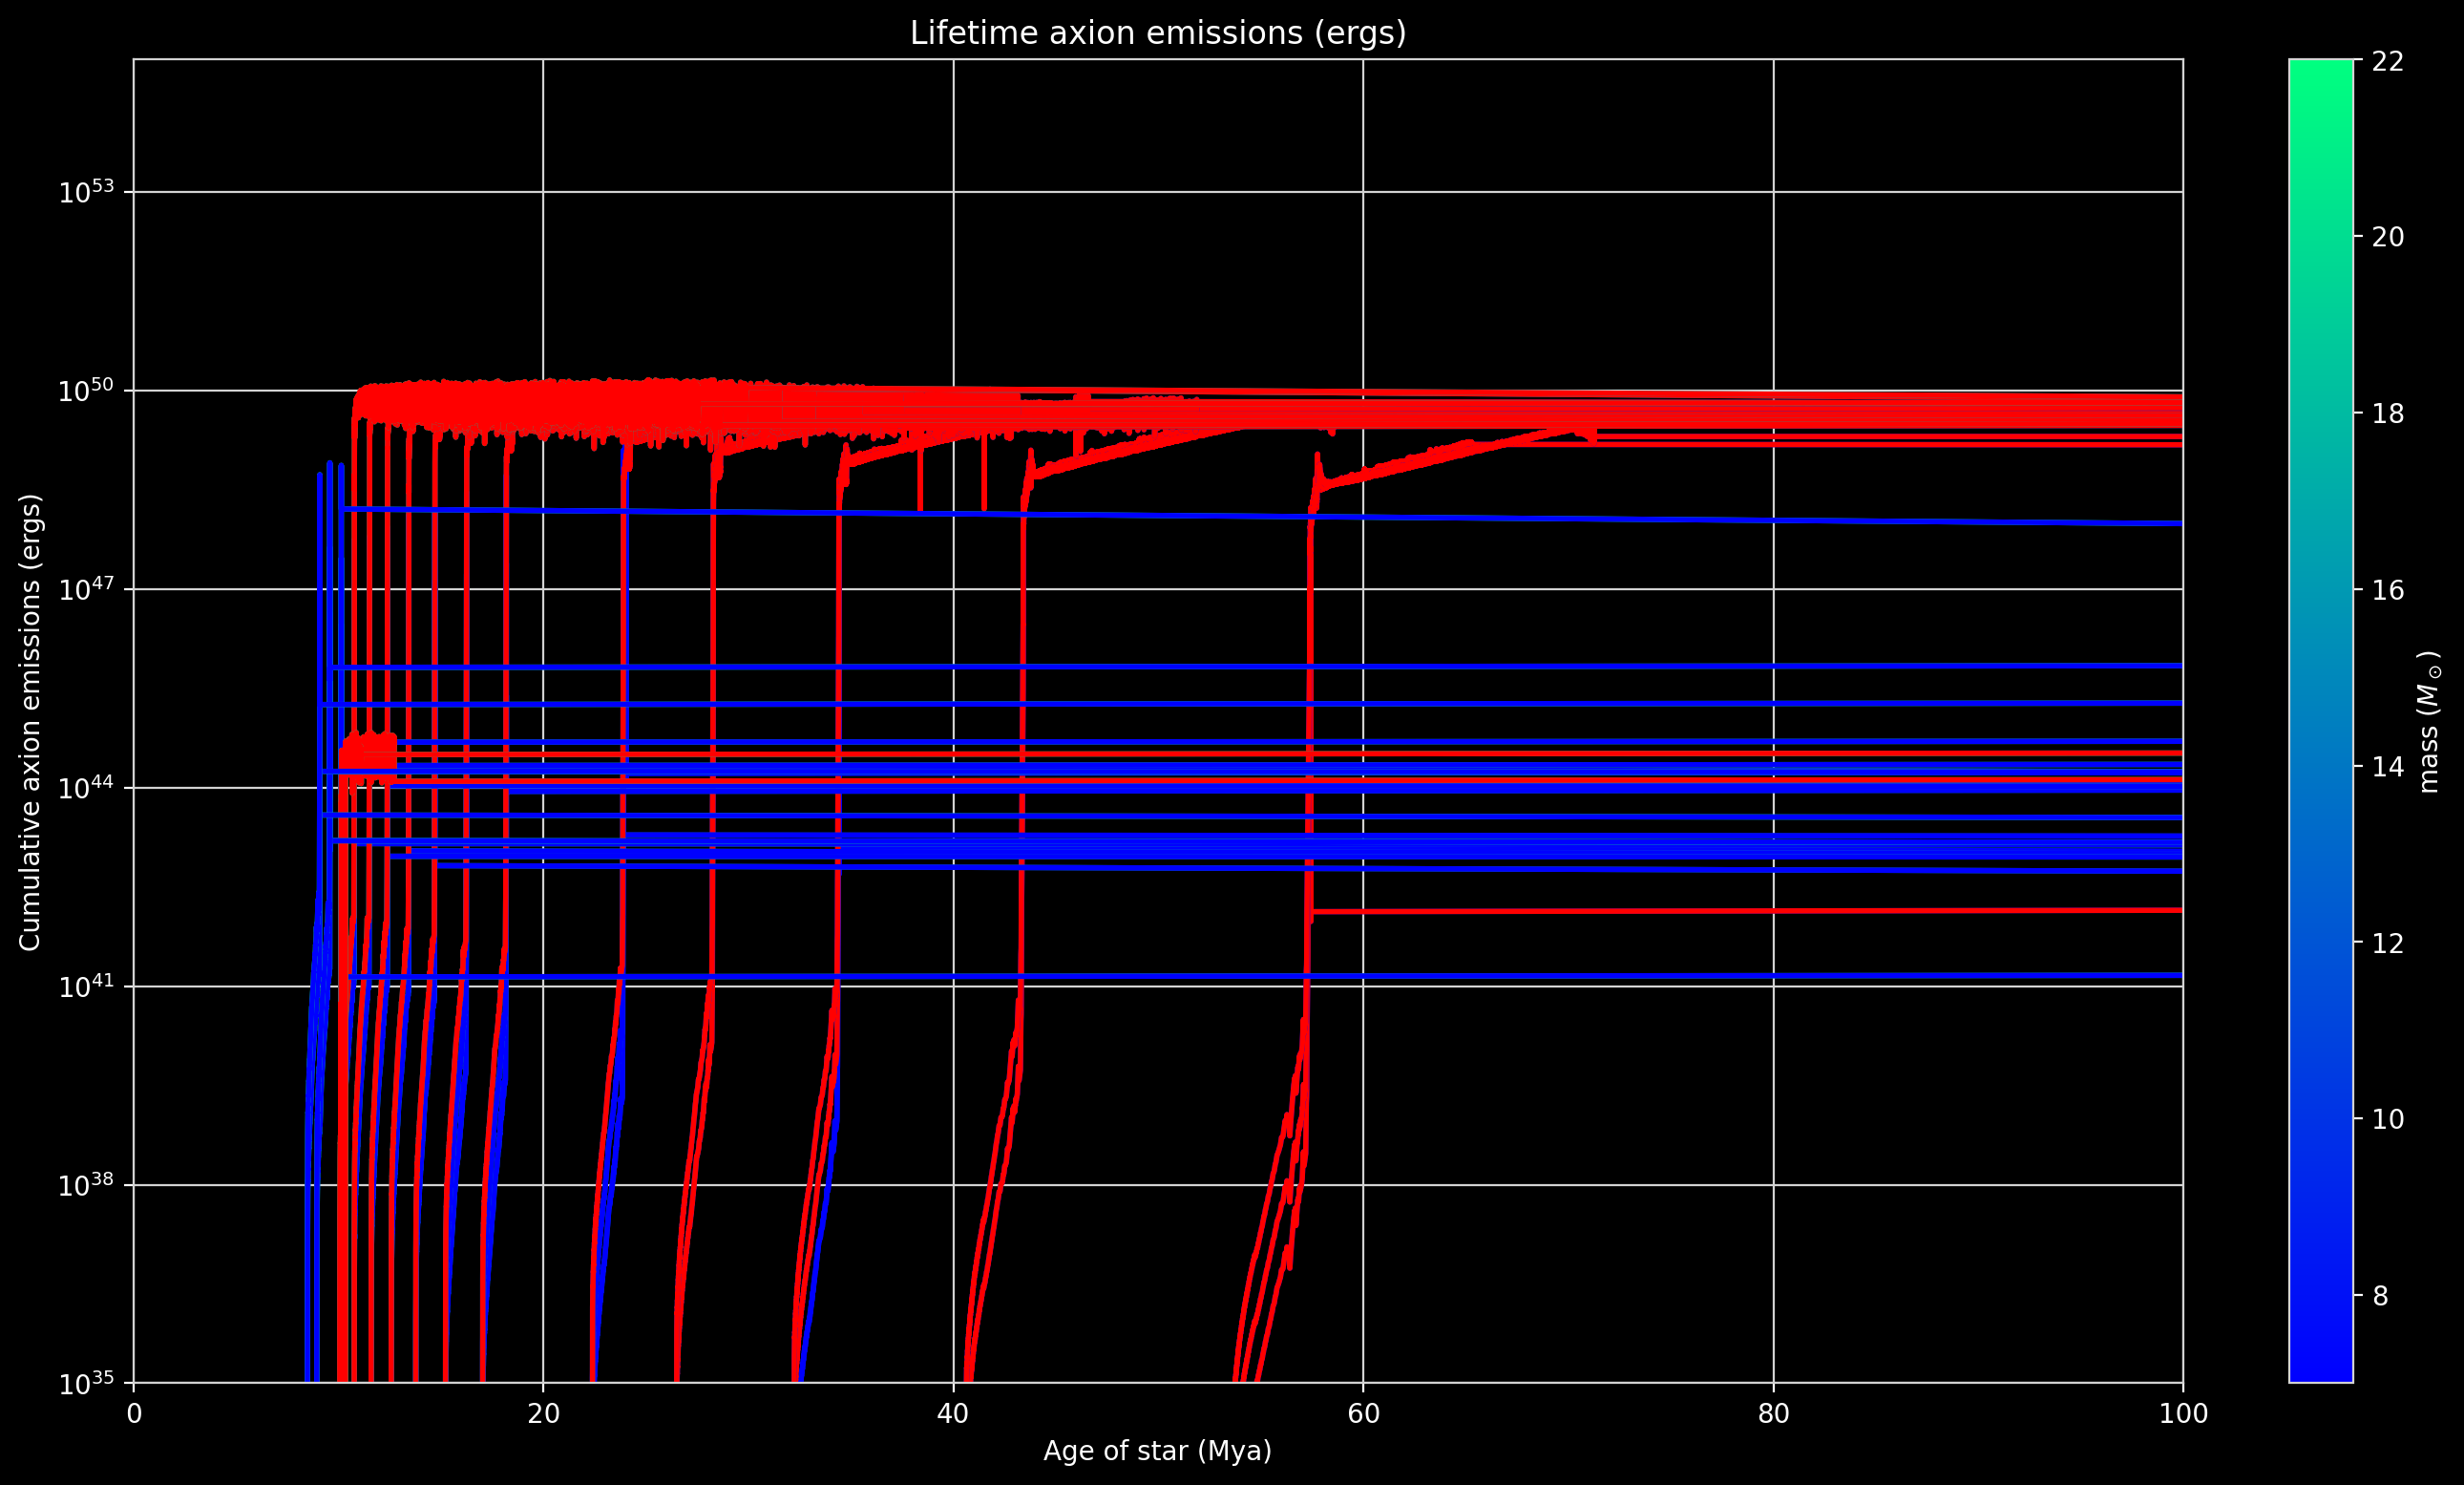

In [23]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['age (years)']) / 1e6
    x[-1] = 100
    y = np.array(run['surface lum_a (ergs/s)'] * run['dt (years)'] * 3.154e+7)
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=2, label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

plt.ylim(1e35, 1e55)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Cumulative axion emissions (ergs)')
plt.grid()

plt.title('Lifetime axion emissions (ergs)', c='white')
# plt.legend()
plt.show()

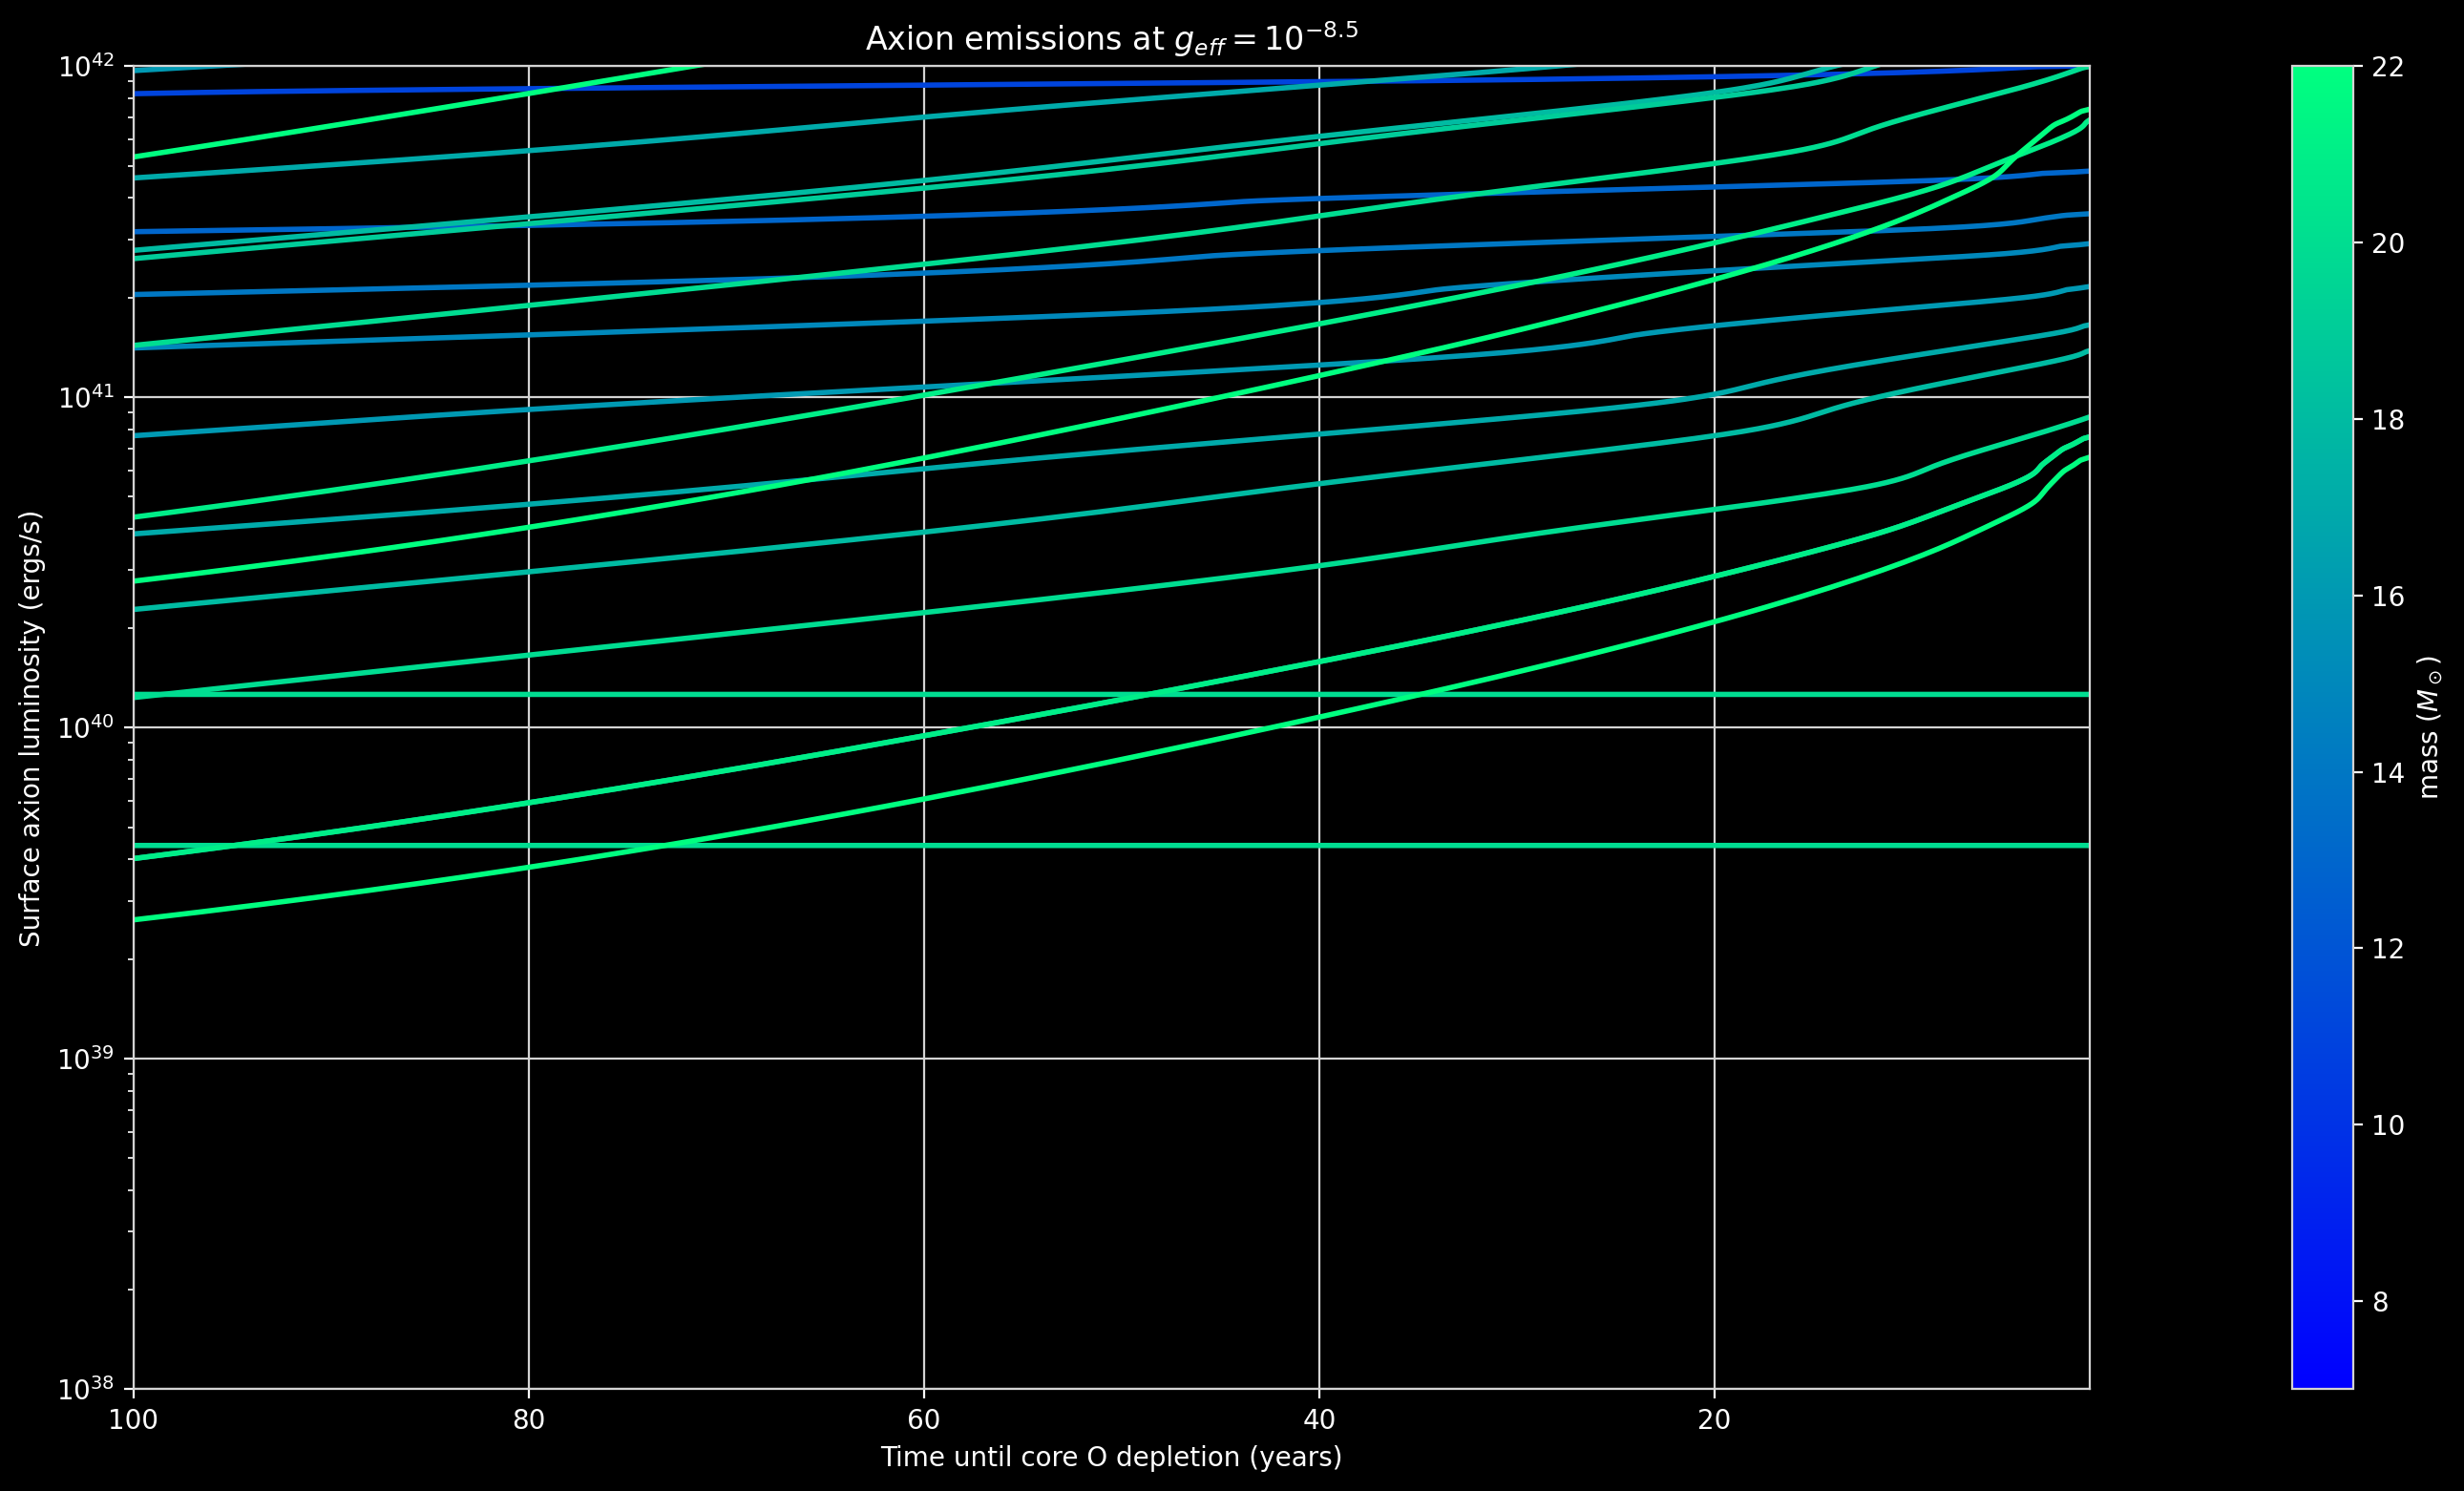

In [15]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['time to core O depletion (years)'])
    dt = np.array(run['dt (years)'])
    rate = np.array(run['surface lum_a (ergs/s)'])
    y = np.cumsum(rate * dt, axis=0)
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))

plt.ylim(1e38, 1e42)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions at $g_{eff}=10^{-8.5}$', c='white')
# plt.legend()
plt.show()

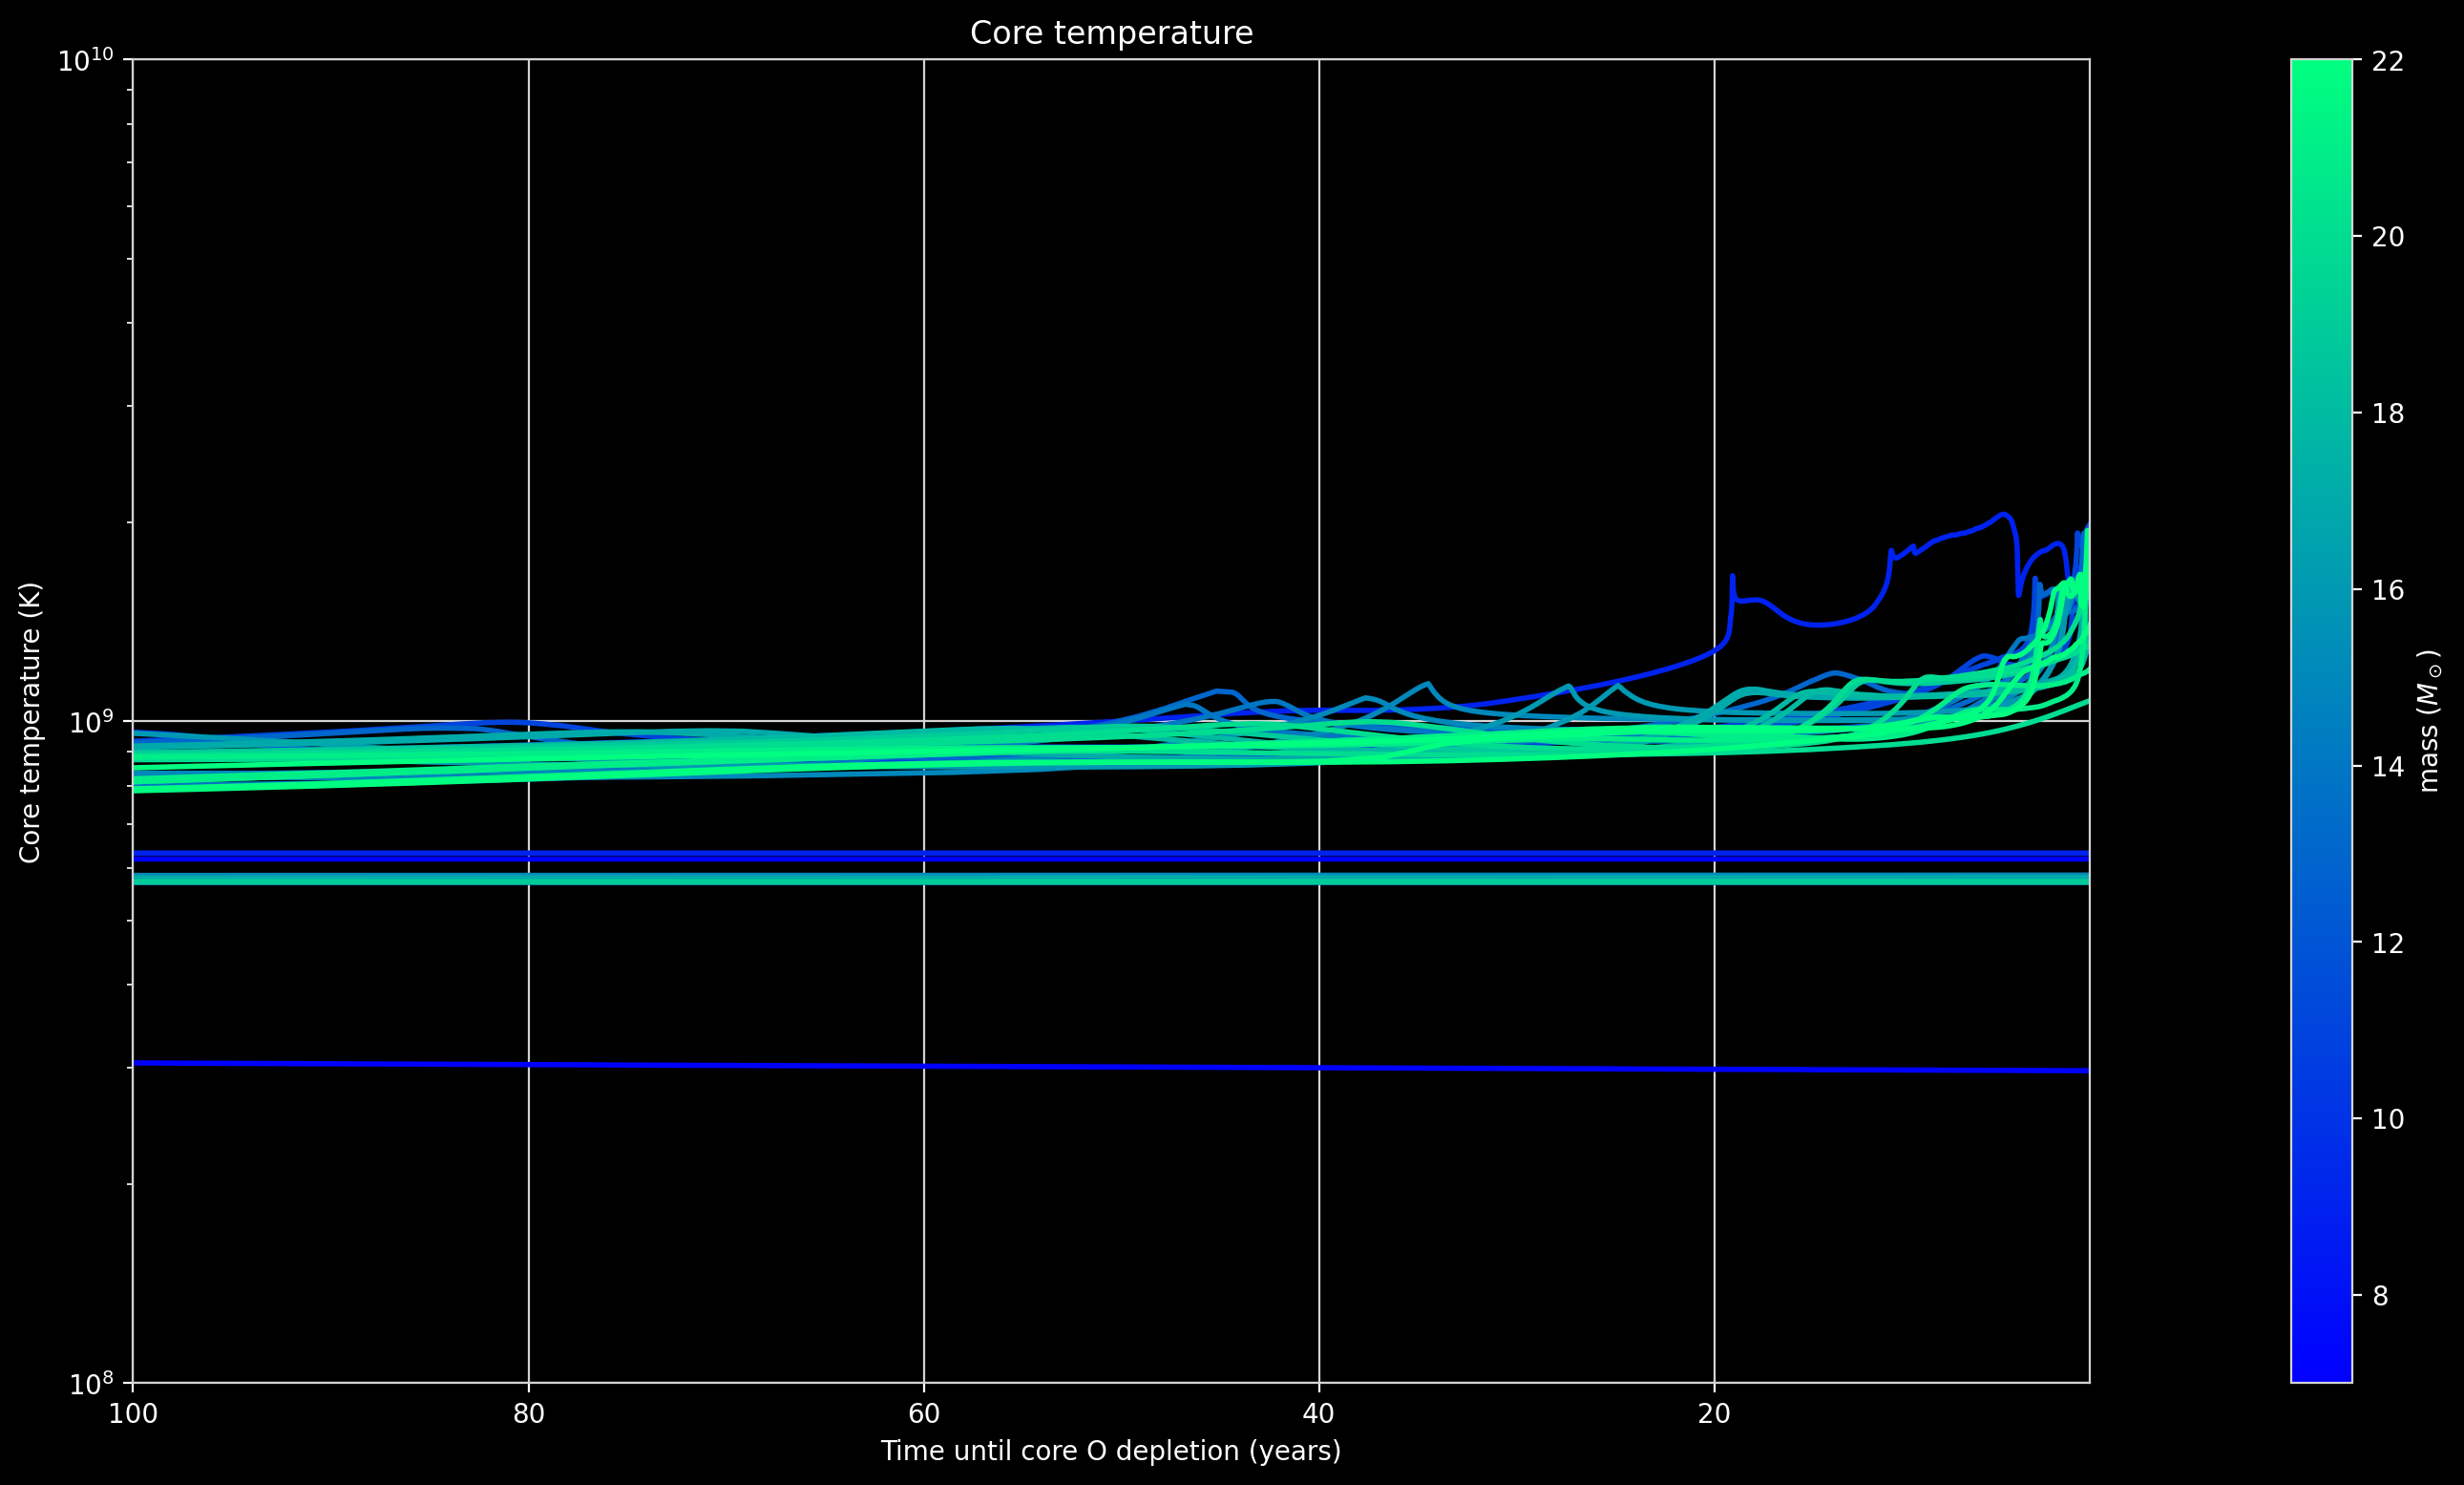

In [107]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)


for key in runs:
    run = runs[key]
    mass = float(key[1:3])
    x = run['time to core O depletion (years)']
    y = run['core T (K)']
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    
plt.ylim(1e8, 1e10)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Core temperature (K)')
plt.grid()

plt.title('Core temperature', c='white')
plt.show()

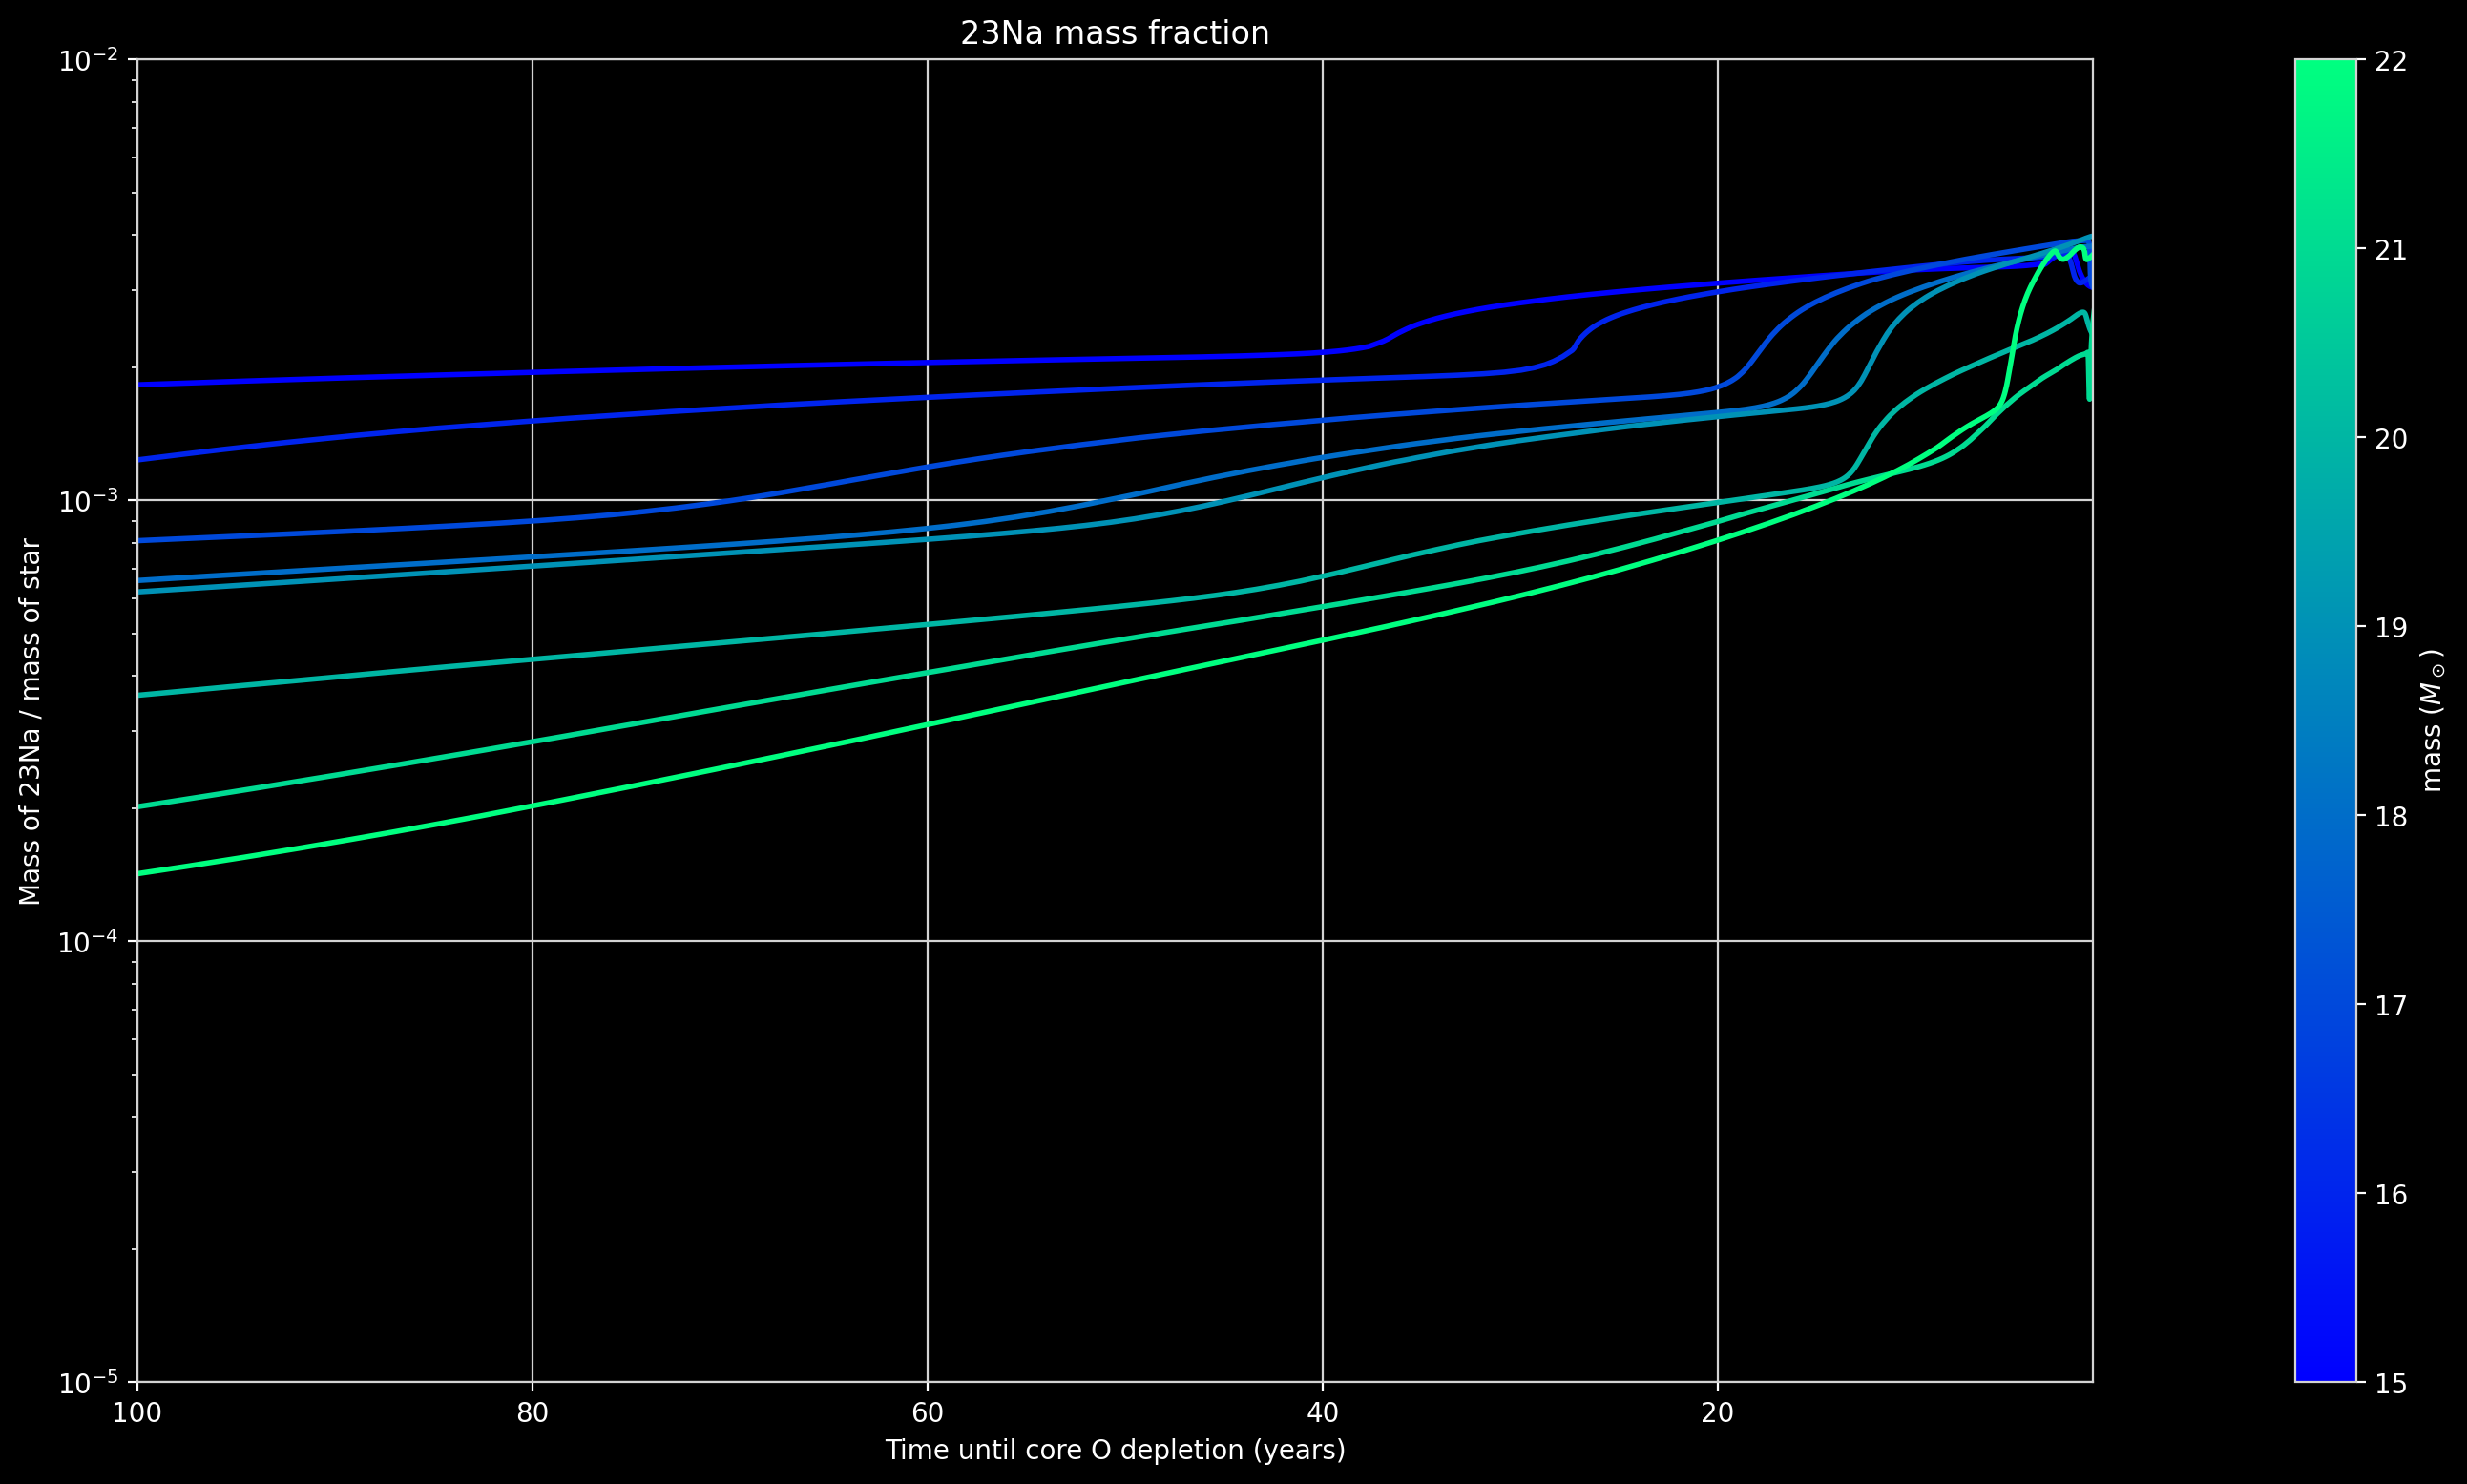

In [93]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)


for key in runs:
    run = runs[key]
    mass = float(key[1:3])
    x = run['time to core O depletion (years)']
    y = run['avg X_na23']
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    
plt.ylim(1e-5, 1e-2)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Mass of 23Na / mass of star')
plt.grid()

plt.title('23Na mass fraction', c='white')
plt.show()

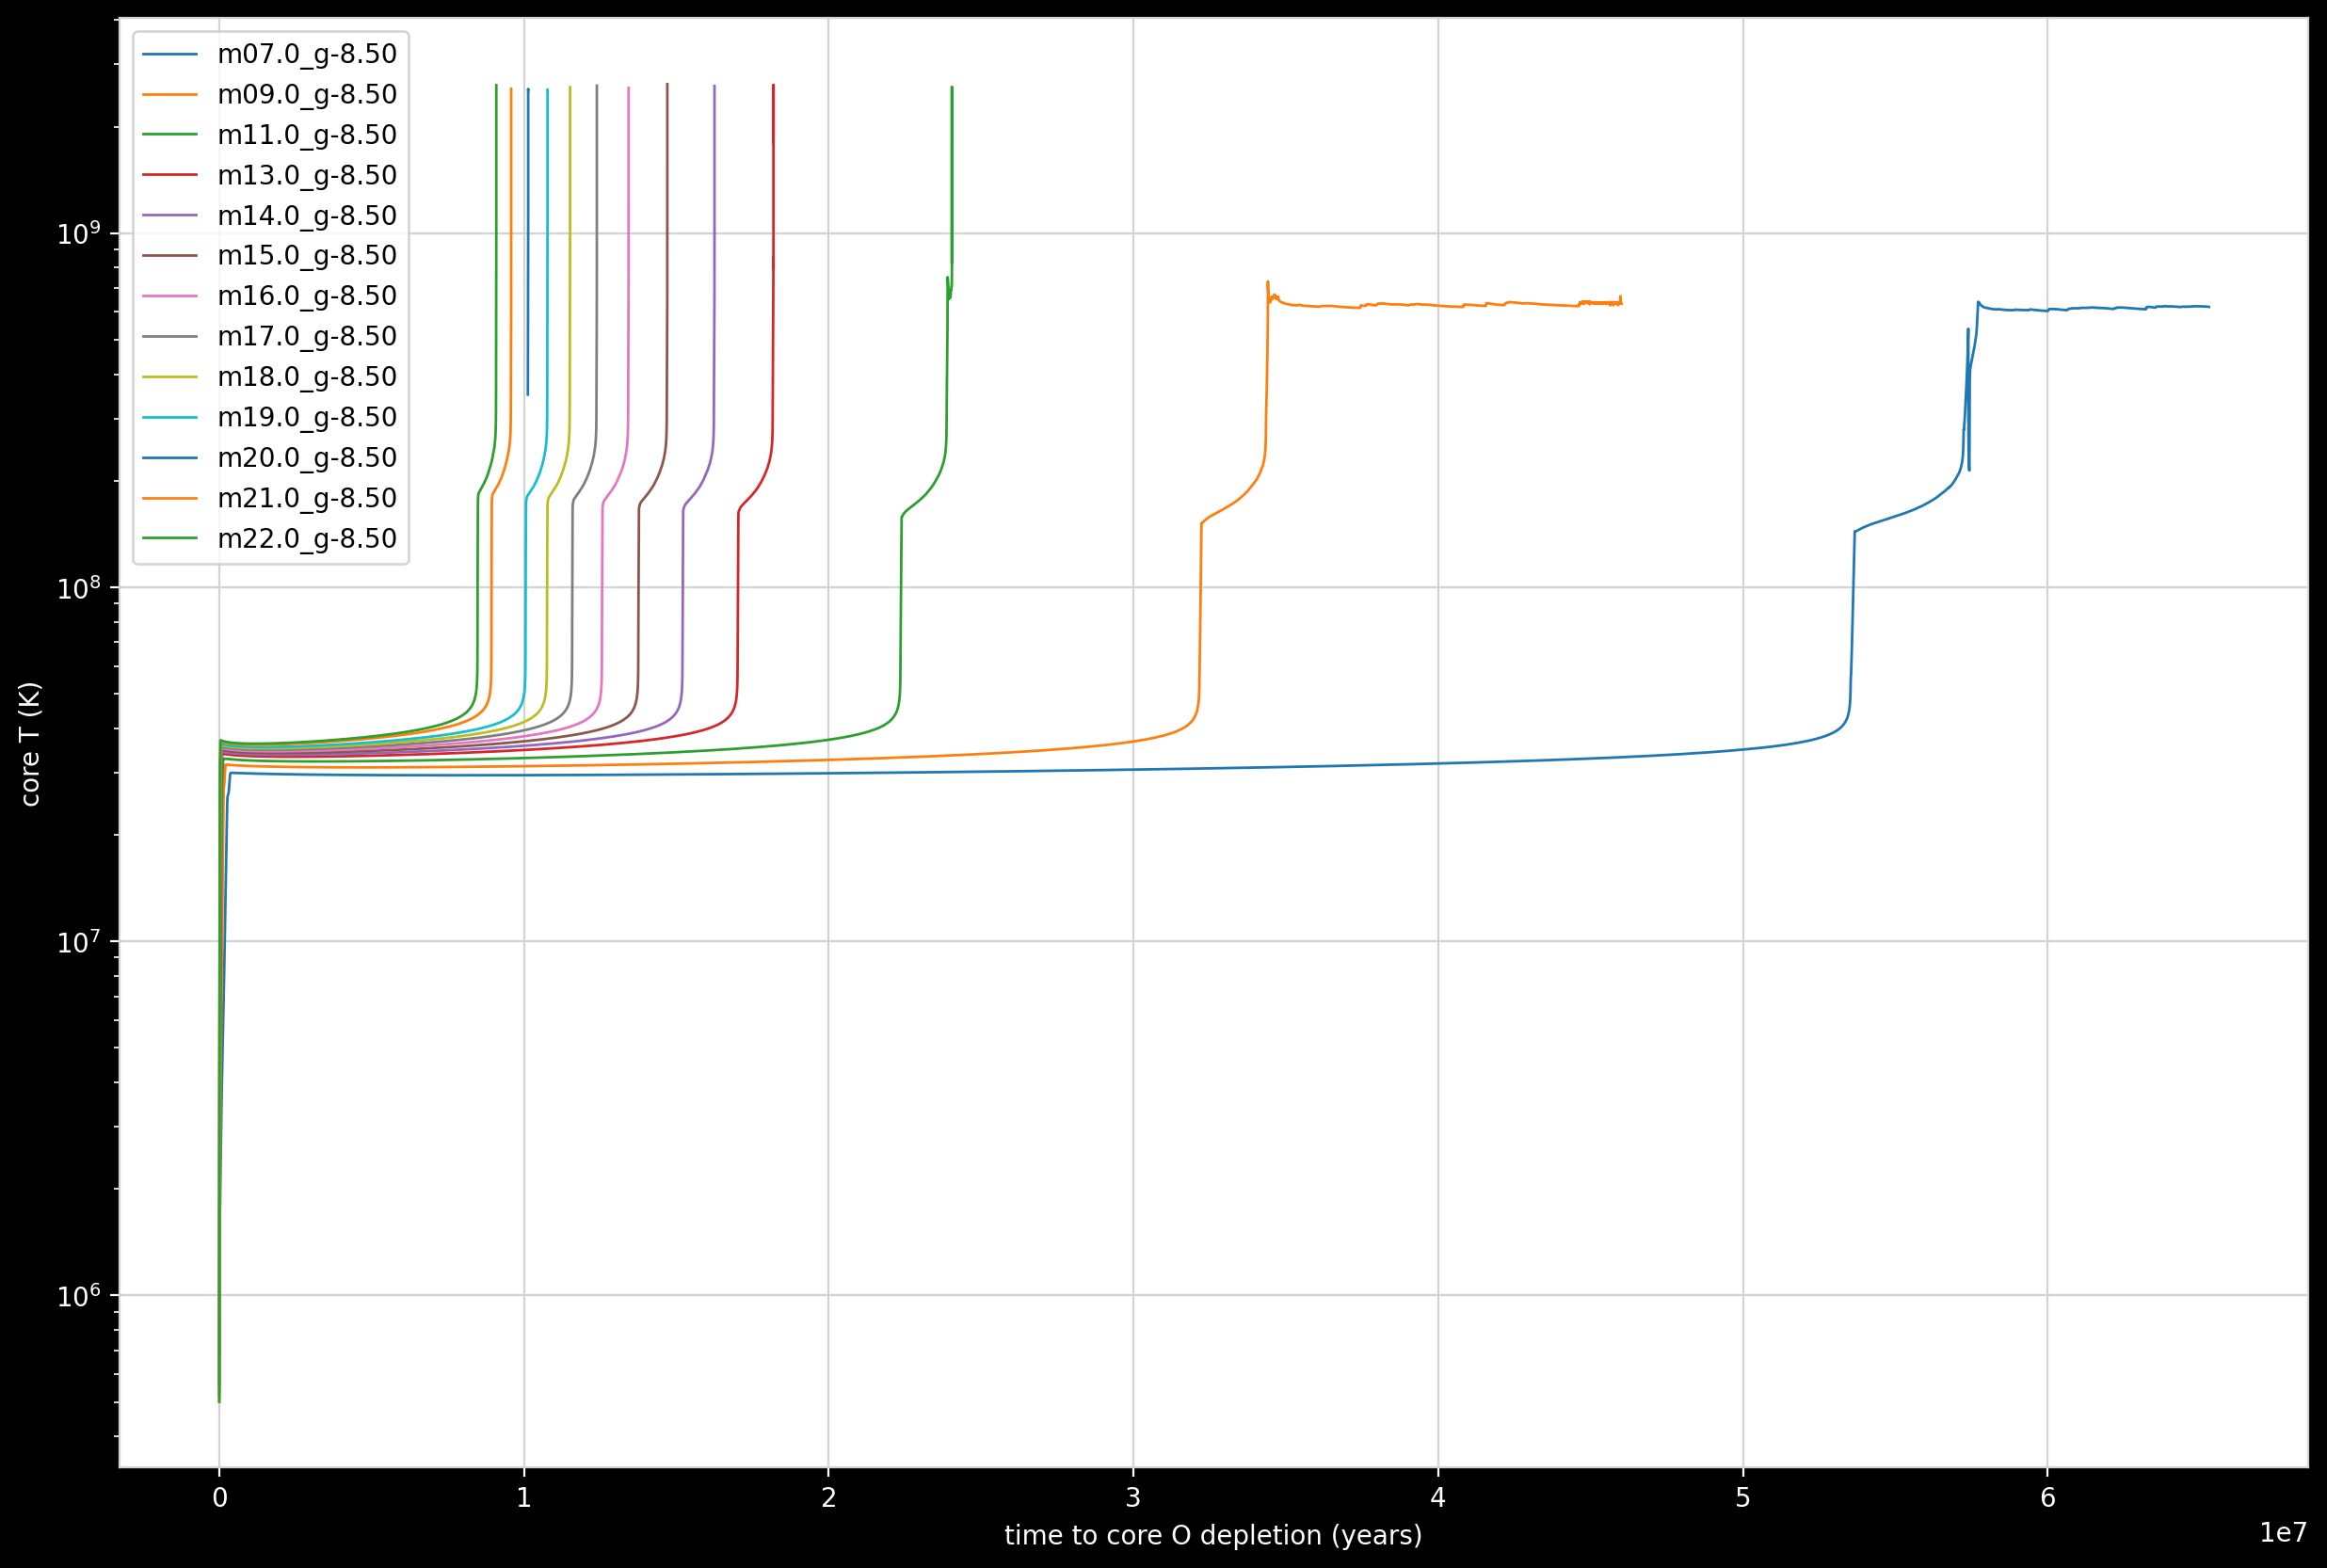

In [49]:
fig, ax = plt.subplots()

ax.set_yscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    x = run['age (years)']
    y = run['core T (K)']
    # y = run['slices']
    # print(y)
    y = np.maximum(y, 1e4)
    plt.plot(x, y, lw=1, label=key)
# plt.ylim(1e20, 1e36)
# plt.xlim(1e6, 0)
plt.xlabel('time to core O depletion (years)')
plt.ylabel('core T (K)')
plt.grid()
plt.legend()

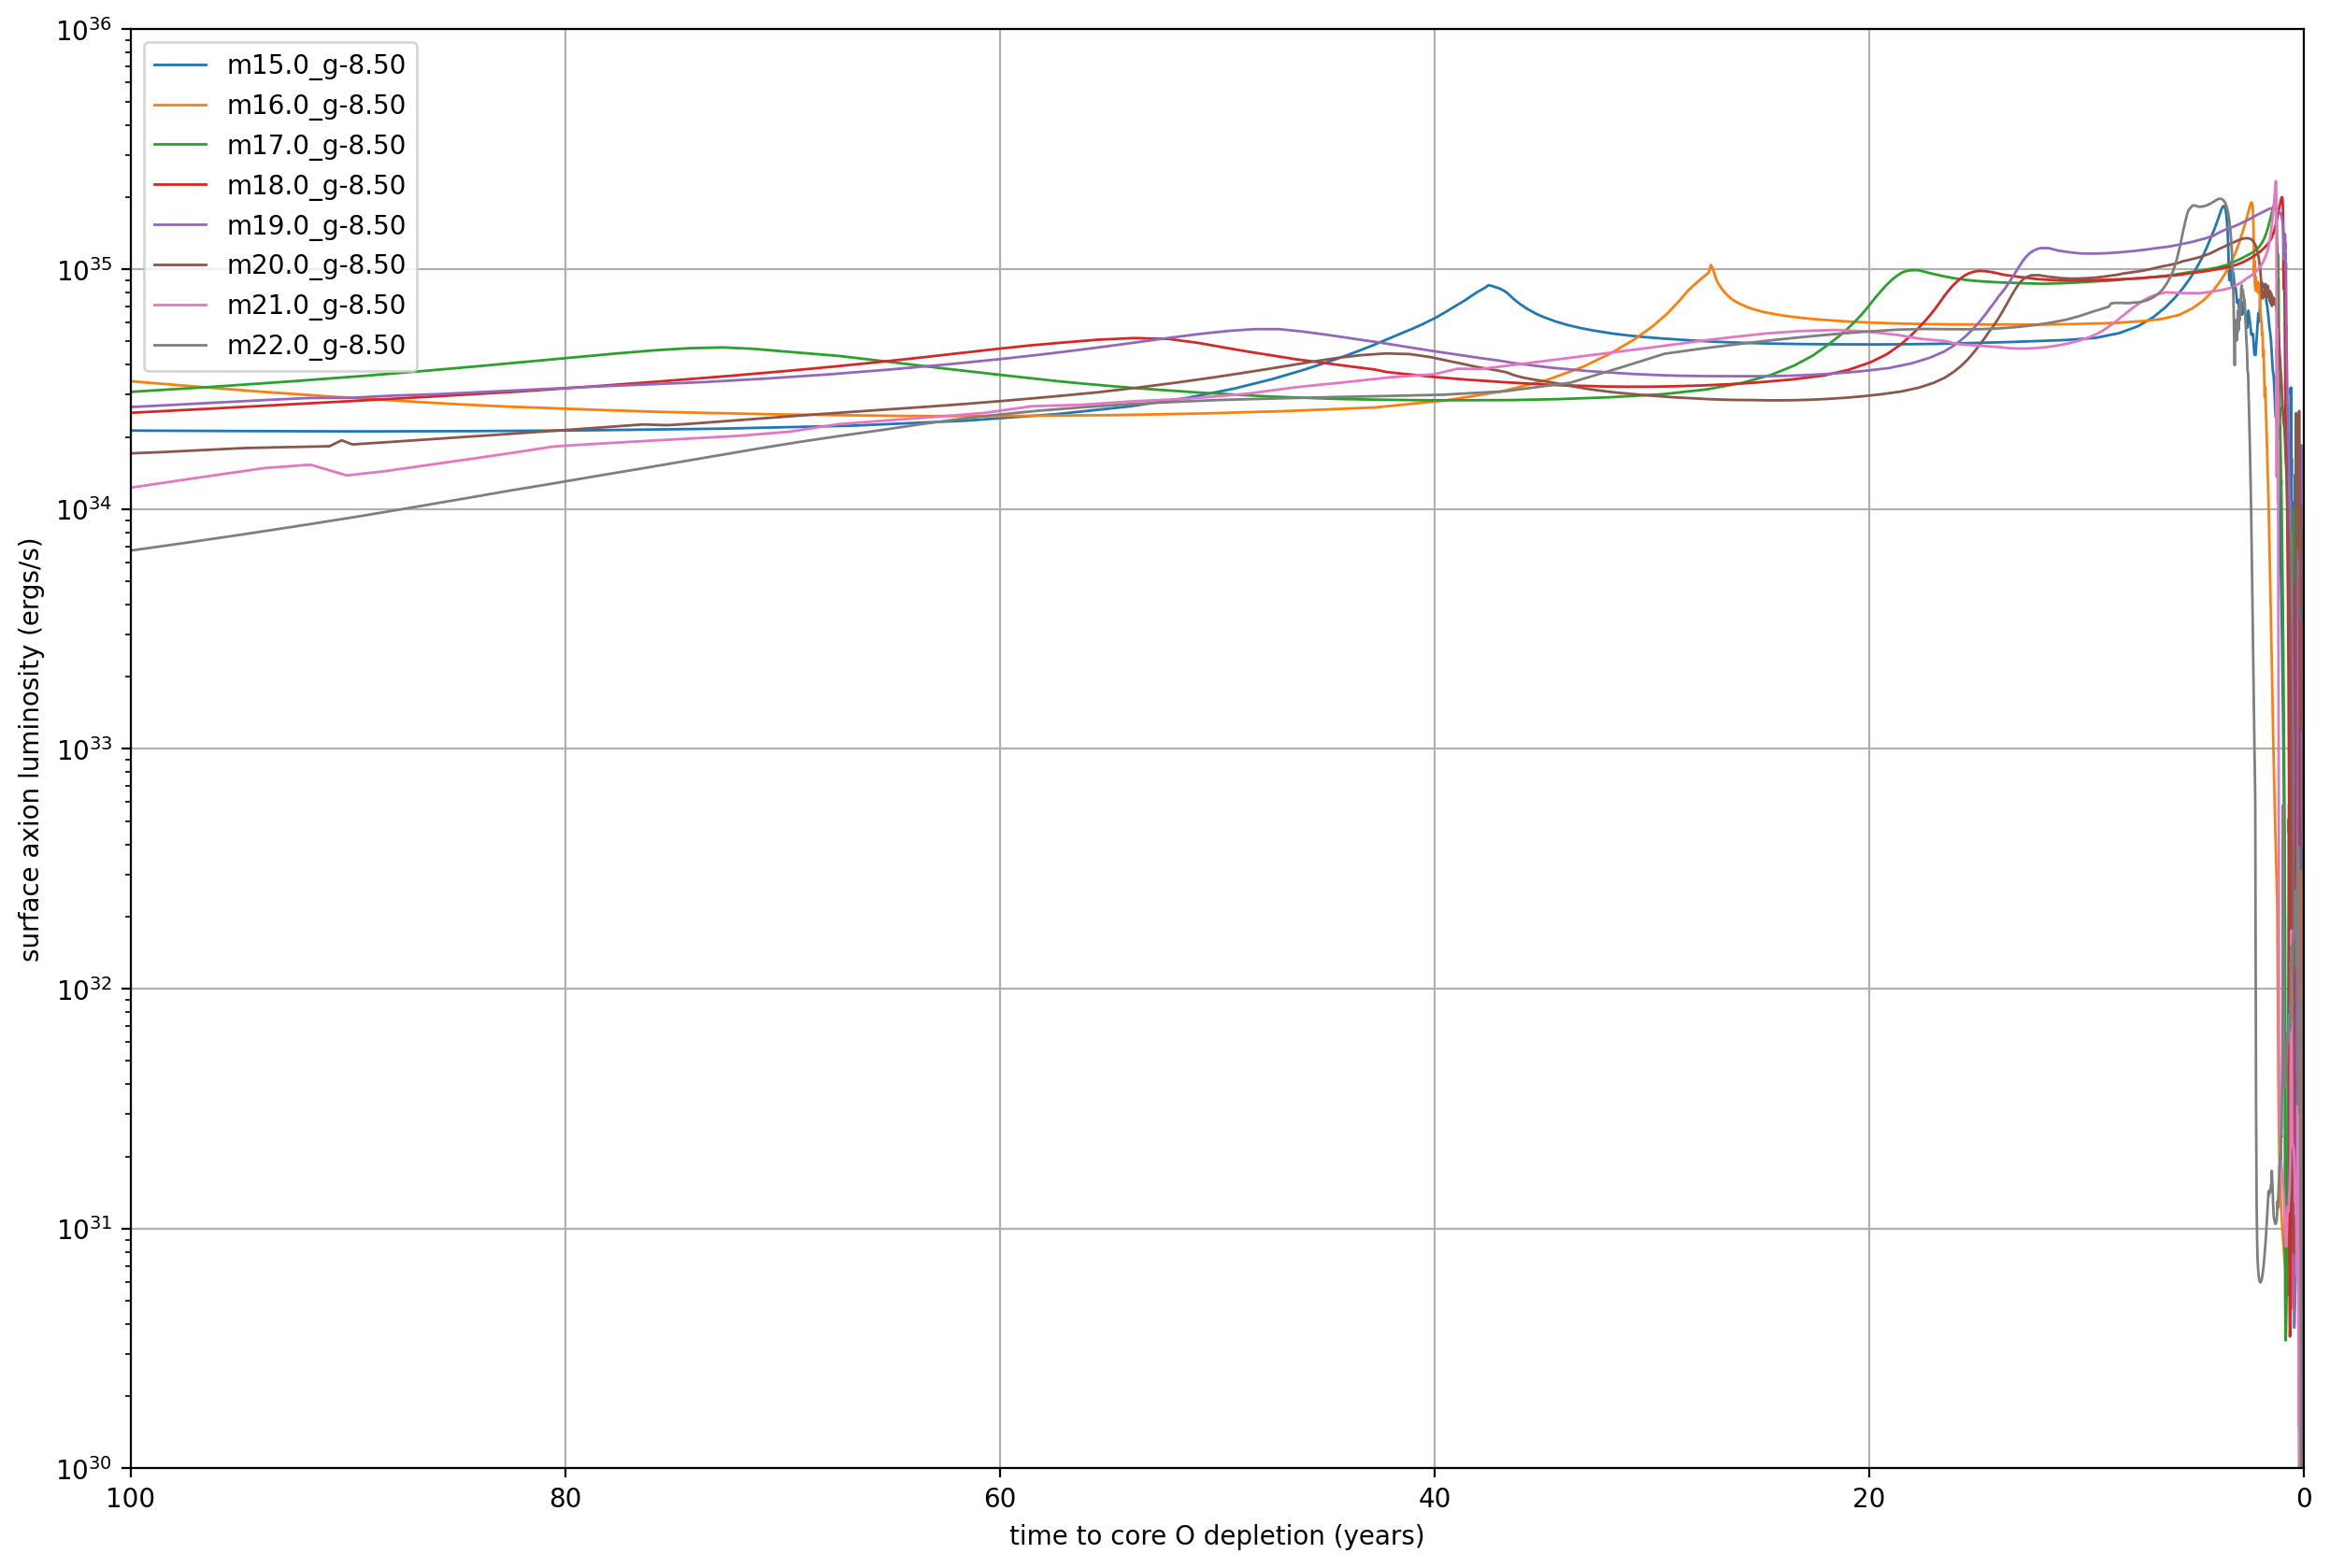

In [53]:
fig, ax = plt.subplots()

ax.set_yscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    x = run['time to core O depletion (years)']
    y = run['surface lum_a (ergs/s)']
    # y = run['slices']
    # print(y)
    y = np.maximum(y, 1e4)
    plt.plot(x, y, lw=1, label=key)
plt.ylim(1e30, 1e36)
plt.xlim(1e2, 0)
plt.xlabel('time to core O depletion (years)')
plt.ylabel('surface axion luminosity (ergs/s)')
plt.grid()
plt.legend()

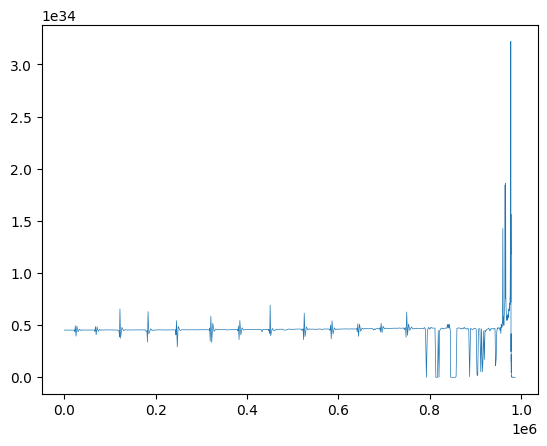

In [10]:
run = runs['g-7.0']
plt.plot(run['time to core O depletion (years)'], np.maximum(10, run['surface lum_a (ergs/s)']), lw=0.5)
# plt.xlim(1000, 0)

In [49]:
np.min(np.array(run['surface lum_a (ergs/s)']))

np.float64(-4.227117894505061e+36)